### Table of Contents

* [Goals](#Goals)
* [Data](#Data)
    * [Loading Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
* [Exploratory Data Analysis](#EDA)
    * [Exploring stats](#section3_1)
    * [Exploring Speed stat](#section3_2)
        * [Analyze flying type](#section3_2_1)
        * [Pokémon with highest speed by type](#section3_2_2)
    * [Exploring Attack stat](#section3_3)
        * [Pokémon with highest attack by type](#section3_3_1)
    * [Exploring Defense stat](#section3_4)
        * [Pokémon with highest defense by type](#section3_4_1)
    * [Exploring Special Attack stat](#section3_5)
        * [Pokémon with highest special attack by type](#section3_5_1)
    * [Exploring Special Defense stat](#section3_6)
        * [Pokémon with highest special defense by type](#section3_6_1)
    * [Exploring Total base stats](#section3_7)
        * [Pokémon with highest total base stat by type](#section3_7_1)
* [Stat findings](#findings)
    * [Exploring Weaknesses and Strengths](#section4_1)
    * [Exploring Weaknesses and Strengths cont.](#section4_2)
* [Choosing our ultimate pokémon team](#choose)
* [Ultimate pokémon team](#conclusion)
* [Extra](#extra)
    * [Which pokémon is the tallest?](#extra_1)
    * [Which pokémon is the shortest?](#extra_2)
    * [Which pokémon weighs the most?](#extra_3)
    * [Which pokémon weighs the most?](#extra_4)
    


    

## Goals <a class='anchor' id='Goals'></a>

We are a newly hired pokémon scientist that have been tasked with finding the ultimate pokémon team by Professor Oak. At our disposal we have the trusty Pokédex. Our goals with this analysis is to:
* Look through the Pokédex to familiarize ourselves with the data. (Inspect the data in pokemon.csv)
* Double check that the Pokédex entries are correct and contain the information we need. (Cleaning the data so its ready for analysis)
* Define conditions that goes into the ultimate pokémon. (Develop questions for analysis)
* Analyze pokémon based on attributes to find the ultimate pokemon team. (analyze variables within the data to gain patterns and insights on these questions)

## Data <a class='anchor' id='Data'></a>

The data in the pokedex has been collected by trainers all around the world of pokémon to create the best pokemon encyclopedia.

(The Data for this project was downloaded from Kaggle:)


[https://www.kaggle.com/datasets/rounakbanik/pokemon/data](https://www.kaggle.com/datasets/rounakbanik/pokemon/data)

(Information regarding the features for the data are located in the "Content" section of the website.)

### Loading Data <a class='anchor' id='section1_1'></a>

To start inspecting the pokedex through Python pandas, we will import the libraries we will need for the analysis:

In [112]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We use the pandas library to import 'pokemon.csv' and view the first 5 rows of the DataFrame.

In [113]:
#read csv file as pokedex
pokedex = pd.read_csv('pokemon.csv')
#Display all columns
pd.set_option('display.max_columns', None)
#print first 5 of each column
print(pokedex.head())

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  against_grass  against_ground  against_ice  \
0             2.0            1.0           0.25       

### Data Information <a class='anchor' id='section1_2'></a>

Some immediate insights are:
* There are 41 columns and 801 rows.
* The name and datatype of each column. In this dataset the most common datatype is float64 and int64.
* Theres a few rows that have missing values: 'height_m', 'percentage_male', 'type2' and 'weight_kg'. Our initial thoughts is that none of these missing values will cause any problems as we wont need any of them to determine which is the ultimate pokemon. We know that some pokemon do not have a second type, so null values in 'type2' is expected. 
* There are multiple columns that we wont be needing for our analysis, but that could be fun to explore, such as: 'height_m', 'weight_kg', 'japanese_name'.
* Some basic summary statistics on each of the numerical variables.

In [114]:
print(pokedex.columns)

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


In [115]:
print(pokedex.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [116]:
# see what columns have missing data
print(pokedex.isnull().sum())

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [117]:
print(pokedex.describe())

       against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000    

## Data Cleaning <a class='anchor' id='cleaning'></a>

As we allready observed, most of our dataset have values, is snake_case formated and have their correct datatypes. There are no special characters in the dataset and we know that pokémon stats range from 0-255, and the pokédex dosent appear to have any large outliers, meaning there is little to clean.
There are a few instances of null values in the 'height_m', 'percentage_male', 'weight_kg' columns, and we will have to decide what to do with these. As we allready discussed, the 'type2' does not need to have any values and we will fill these with the value "none".

* Fill column 'type2' with "none" values.
* Fill columns in 'height_m', 'percentage_male' and 'weight_kg' to the value "0". For our analysis to find the ultimate pokémon team, these columns are of no value, but we might revisit them later for some cool insights into pokemon. 

In [118]:
#Replace missing values in the type2 column to 'none'
pokedex['type2'] = pokedex['type2'].fillna('none')

#Replace missing values in height_m, percentage_male and weight_kg with "0". 
pokedex.fillna(0, inplace=True)

With our dataset cleaned and ready for use we'll start by describing some parameters for our ultimate pokemon team.

## Exploratory Data Analysis <a class='anchor' id='EDA'></a>

After cleaning some corrupted files, the Pokédex is ready for EDA. When Professor Oak gave us the task to find the ultimate pokémon team, we were given some conditions the team/pokémon must follow: 

* Only one pokémon per type, and only one of each pokémon.
* Exclude legendary and Mega evolutions.
* The best pokémon per type is decided by its total stat score, x stat score, and how many other pokémon it is effective against.
* The team will consist of the highest of each stat, excluding hp, and the highest total stat pokémon.

Key variables will be the type and stat columns.

Through summary statistics and visualizations we'll figure out which pokémon team is the ultimate team, and answer other fun questions like:

* Which pokémon is the tallest?
* Which pokémon weighs the most?
* Which type is overall the speediest etc?

Among other fun tidbits we might discover.

### Exploring stats <a class='anchor' id='section3_1'></a>

In this section our goal is to find the ultimate pokémon per stat. Pokémon have 7 different stats:

* Speed, How fast is the pokémon
* Attack, How hard the pokémon hit with physical attacks
* Defense, How durable is the pokémon against physical attacks
* Special Attack, How hard the pokémon hit with special attacks
* Special Defense, How durable is the pokémon against special attacks
* Total base stats, Higher total stats means the pokémon is overall stronger 
* Health points, How manye health points does a pokémon have

We'll analyze which pokémon has the highest of each stat (Except the health points stat) and use that pokémon for our ultimate pokémon team. 

Before we start analyzing our pokémon, we'll create some lists that we'll use to find the ultimate pokémon.

In [119]:
#List containing all 18 pokemon types
types = ['bug', 'dark', 'dragon',
       'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground',
       'ice', 'normal', 'poison', 'psychic',
       'rock', 'steel', 'water']

#List containing colors for each type for vizualisation
type_colors = {
    'normal':   '#A8A77A',
    'fire':     '#EE8130',
    'water':    '#6390F0',
    'electric': '#F7D02C',
    'grass':    '#7AC74C',
    'ice':      '#96D9D6',
    'fighting': '#C22E28',
    'poison':   '#A33EA1',
    'ground':   '#E2BF65',
    'flying':   '#A98FF3',
    'psychic':  '#F95587',
    'bug':      '#A6B91A',
    'rock':     '#B6A136',
    'ghost':    '#735797',
    'dragon':   '#6F35FC',
    'dark':     '#705746',
    'steel':    '#B7B7CE',
    'fairy':    '#D685AD'
}
#List cointaining the 6 stats we're interested in
stats = ['speed', 'attack', 'defense', 'sp_attack', 'sp_defense', 'base_total']

### Exploring Speed stat <a class='anchor' id='section3_2'></a>

First we'll look into what the speed stat for each type looks like. We'll take the top 5 pokémon of each type and plot them to analyze what the types speed stat look like.

From the first plots we see that:
* The max speed of each type range from 100-160.
* The min speed of each type range from 5-55.
* Ninjask(Bug) is the fastest pokémon with 160.
* Electric pokémon are on average the fastest type with 82. Steel pokémon are on average the slowest type with 49.
* Flying type is only showing 2 pokémon instead of 5, why?



<Figure size 640x480 with 0 Axes>

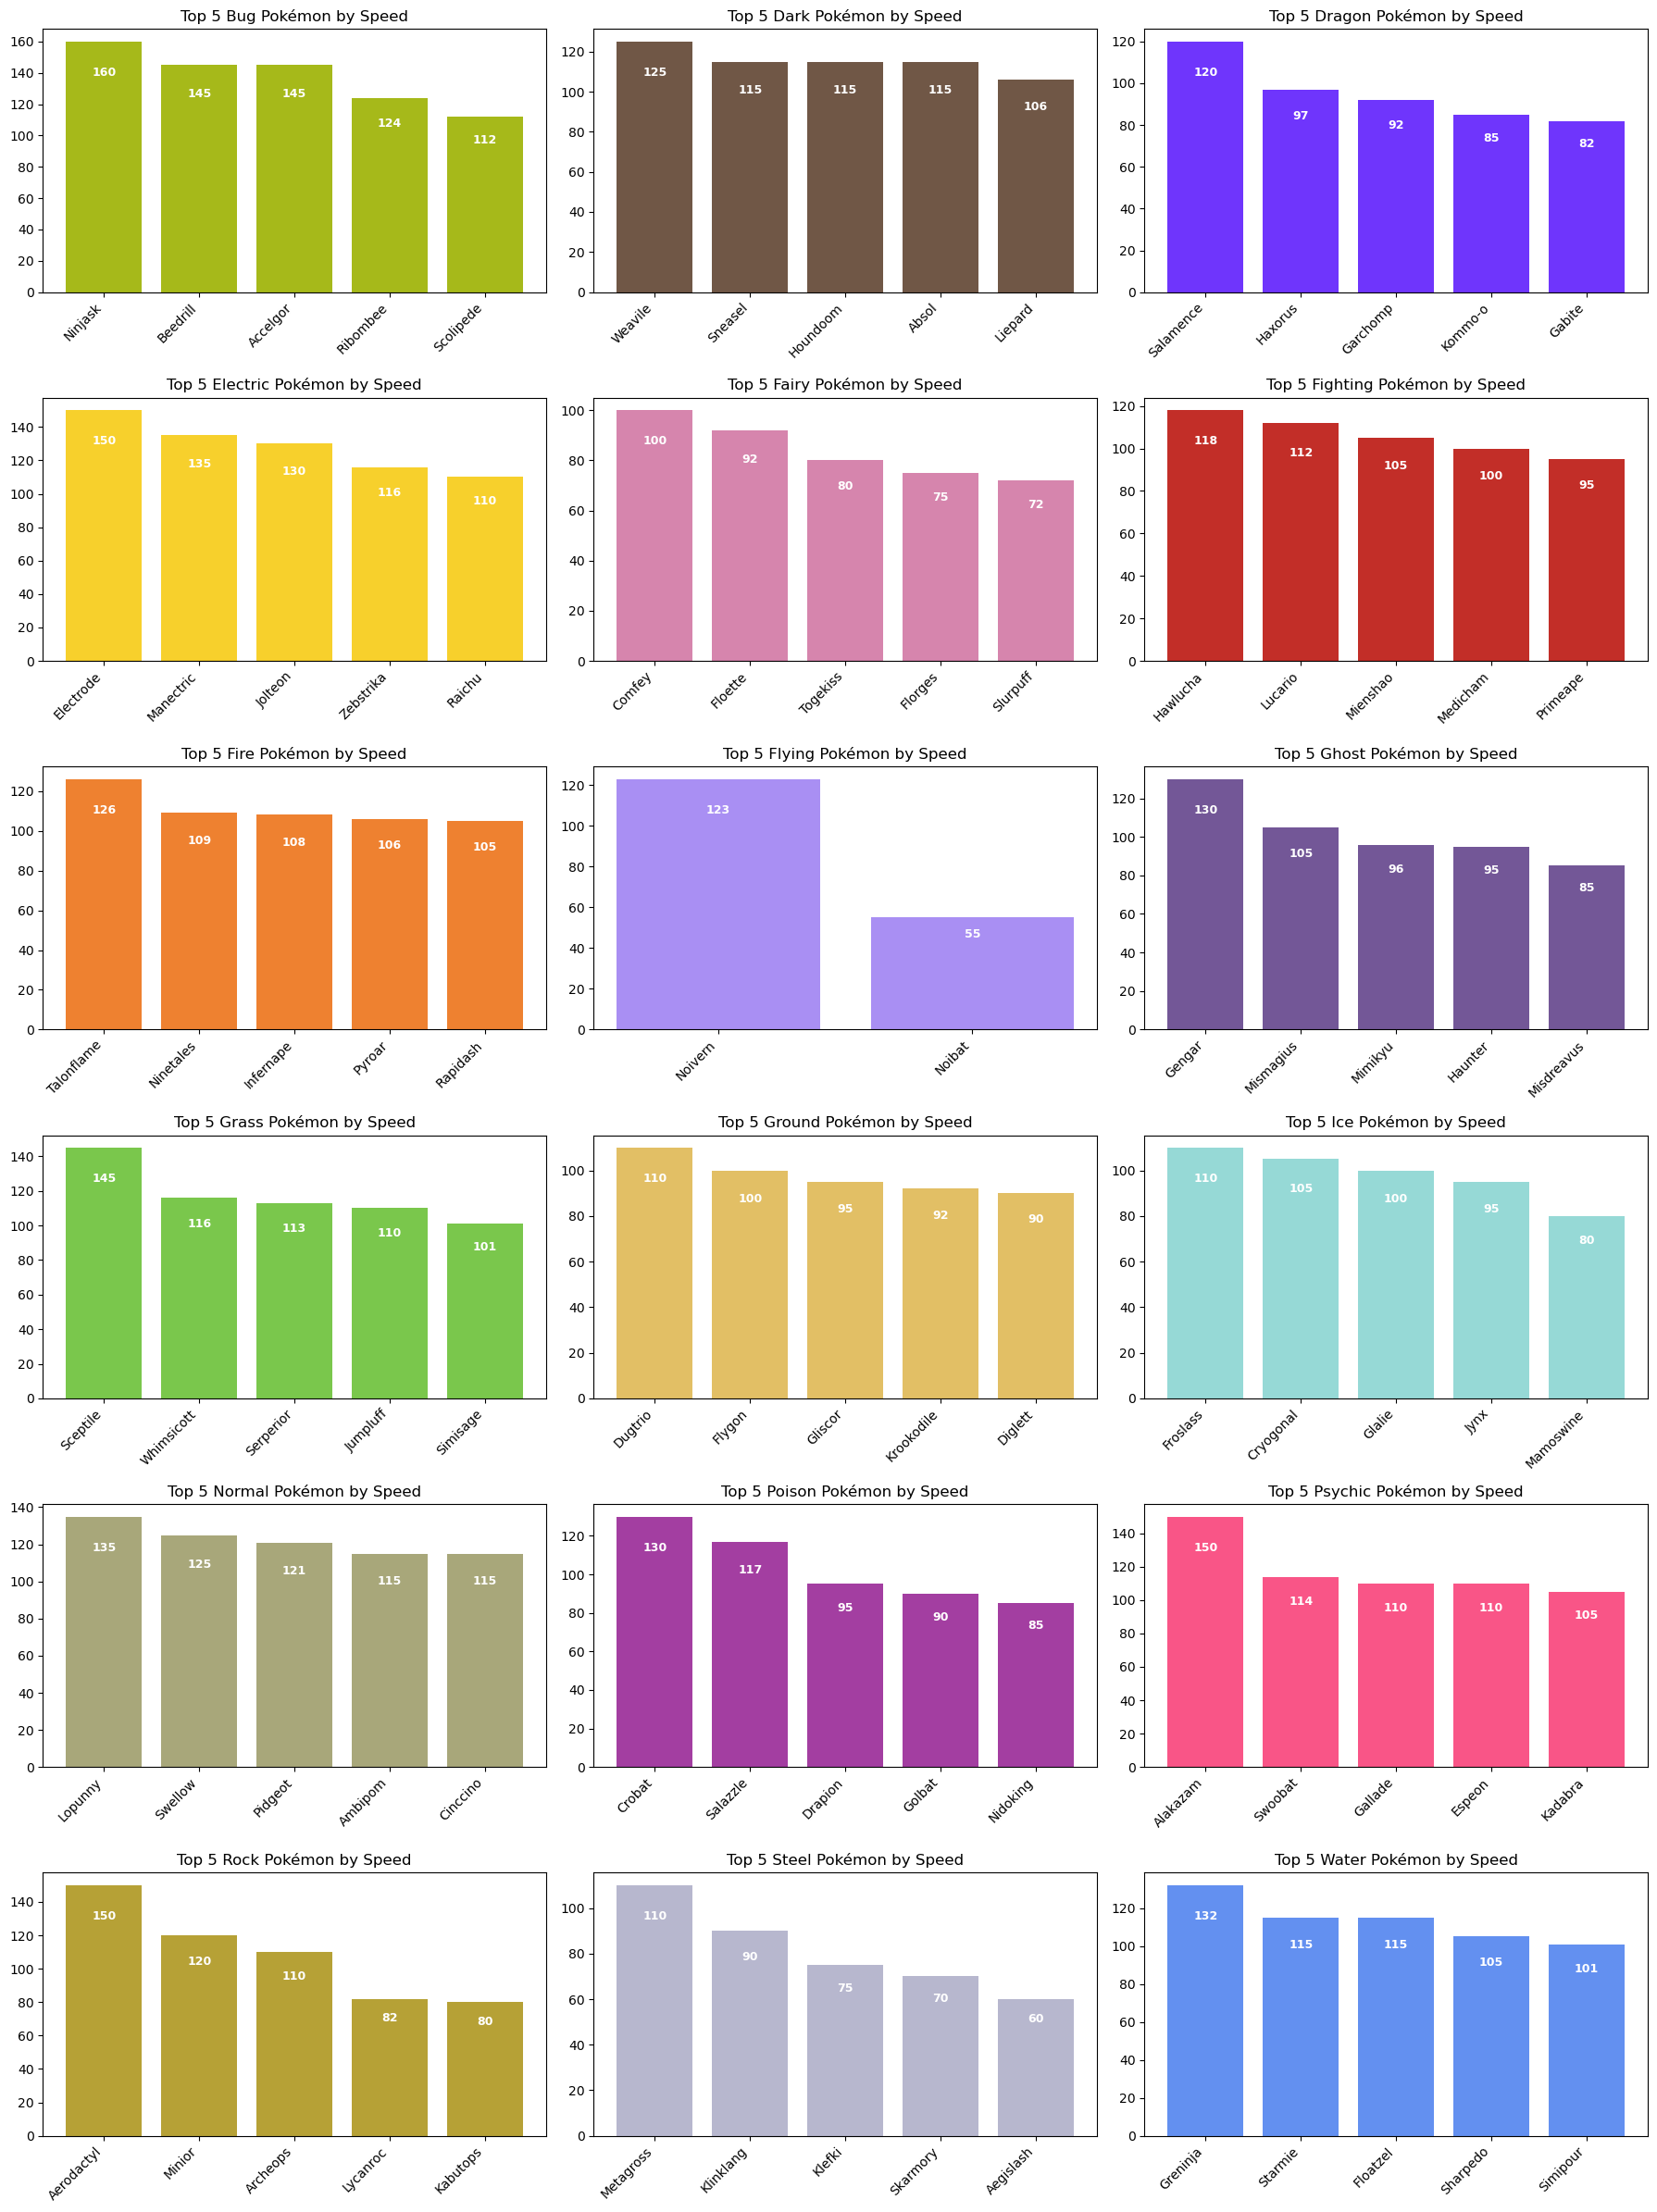

In [120]:
# Create list to hold our best pokemon per stat per type 
speed = []

# Setup grid for subplots
n_cols = 3
n_rows = int(np.ceil(len(types) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Iterate through all types and remove all legendary pokemon
for idx, i in enumerate(types):
    ax = axes[idx]
    speedtype = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    
    # Find the top 5 pokemon per stat per type
    top5i = speedtype.sort_values(by='speed', ascending=False).head(5)
   
    
    # Assign colors from type_colors dict
    colors = top5i['type1'].map(type_colors)
    
    # Create bar plot
    bars = ax.bar(top5i['name'], top5i['speed'], color=colors)
    ax.set_title(f'Top 5 {i.capitalize()} Pokémon by Speed')
    
    # Set xticks and xticklabels
    ax.set_xticks(range(len(top5i)))
    ax.set_xticklabels(top5i['name'], rotation=45, ha='right')
    
    
    # Add stat total on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.9,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

    # Add best Pokémon to list
    if not top5i.empty:
        best = top5i.iloc[0]  # first row
        speed.append({'type': i, 'name': best['name'], 'speed': best['speed']})

# Hide any unused subplots
for j in range(len(types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.clf()

In [121]:
#Which pokemon type has on average the best stat and lowest stat range
avg_min_types = []
for i in types:
    avg_min = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    avg_min_types.append({
        'type': i,
        'avg_speed': avg_min['speed'].mean(),
        'min_speed': avg_min['speed'].min()
    })

avg_min_types_df = pd.DataFrame(avg_min_types)
avg_min_types_df

,type,avg_speed,min_speed
0,bug,61.565217,5
1,dark,73.730769,20
2,dragon,68.000000,40
3,electric,82.411765,35
4,fairy,51.000000,15
5,fighting,64.285714,25
6,fire,72.063830,20
7,flying,89.000000,55
8,ghost,57.115385,15
9,grass,56.554054,10


#### Analyze flying type <a class='anchor' id='section3_2_1'></a>
We'll analyze why flying is only showing 2 entires instead of the expected 5.

We see that flying type only contains 3 entries, with 1 being a legendary pokémon, that we are excluding from our team. 
This is probably because most flying type pokémon have their type1 set to another type.

In [122]:
flying_type = pokedex[pokedex['type1'] == 'flying']
flying_type[['name', 'type1']]


,name,type1
640,Tornadus,flying
713,Noibat,flying
714,Noivern,flying


As we see from the table below, if we also include all pokémon with type2 as flying we get 98 different pokémon.
It would seee some of the pokémon in the pokedex might be wrongly typed. This does not actually pose any difficulties, but is worth noting.

In [123]:
flying_type = pokedex[((pokedex['type1'] == 'flying') | (pokedex['type2'] == 'flying'))]
flying_type[['name', 'type1', 'type2']]

,name,type1,type2
5,Charizard,fire,flying
11,Butterfree,bug,flying
15,Pidgey,normal,flying
16,Pidgeotto,normal,flying
17,Pidgeot,normal,flying
...,...,...,...
731,Trumbeak,normal,flying
732,Toucannon,normal,flying
740,Oricorio,fire,flying
773,Minior,rock,flying


#### Pokémon with highest speed by type <a class='anchor' id='section3_2_2'></a>

Below we'll plot the pokémon with highest speed by type.
* Ninjask(Bug) is the fastest pokémon overall with 160.

<Figure size 640x480 with 0 Axes>

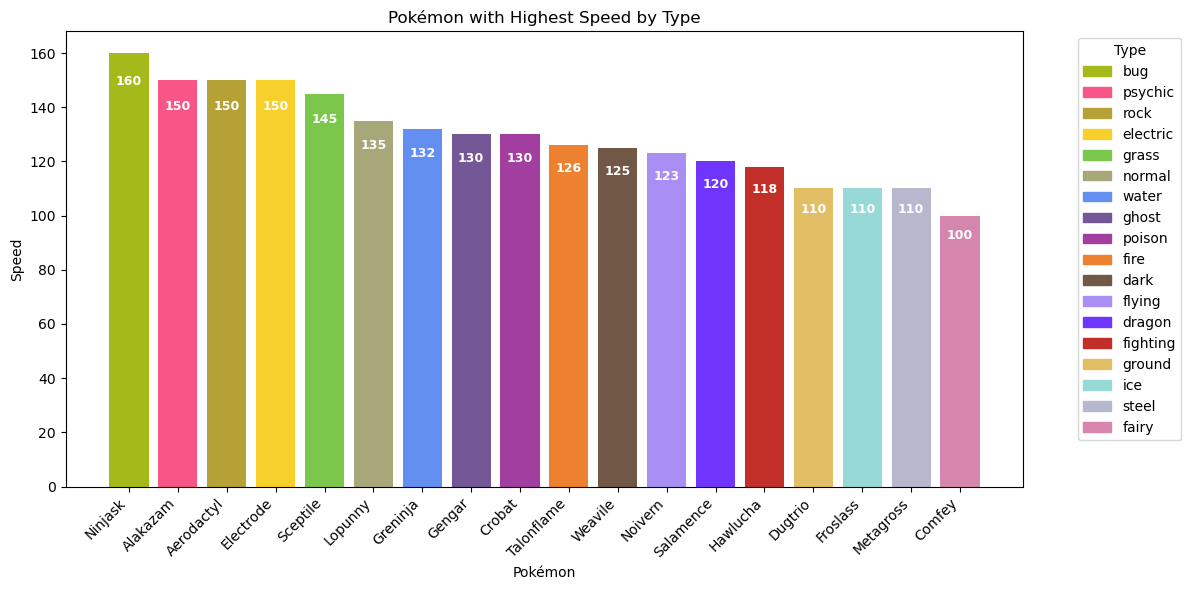

In [124]:
# Create new dataframe from stat list
speed_df = pd.DataFrame(speed)

# Sort descending by speed
speed_df = speed_df.sort_values(by='speed', ascending=False)

# Assign colors based on type
colors = speed_df['type'].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(speed_df['name'], speed_df['speed'], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

# Labels
plt.xlabel('Pokémon')
plt.ylabel('Speed')
plt.title('Pokémon with Highest Speed by Type')

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in speed_df['type'].unique()]
labels = speed_df['type'].unique()
plt.legend(handles, labels, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

### Exploring Attack stat <a class='anchor' id='section3_3'></a>

Next we'll look into what the attack stat for each type looks like. We'll take the top 5 pokémon of each type and plot them to analyze what the types attack stat look like.

From the first plots we see that:
* The max attack of each type range from 70-185.
* The min attack of each type range from 5-50
* Heracross(Bug) is the strongest physical pokémon with 185.
* Dragon pokémon are on average the strongest physical types with 98. Psychic pokémon are on average the weakest physical types with 50.
  

<Figure size 640x480 with 0 Axes>

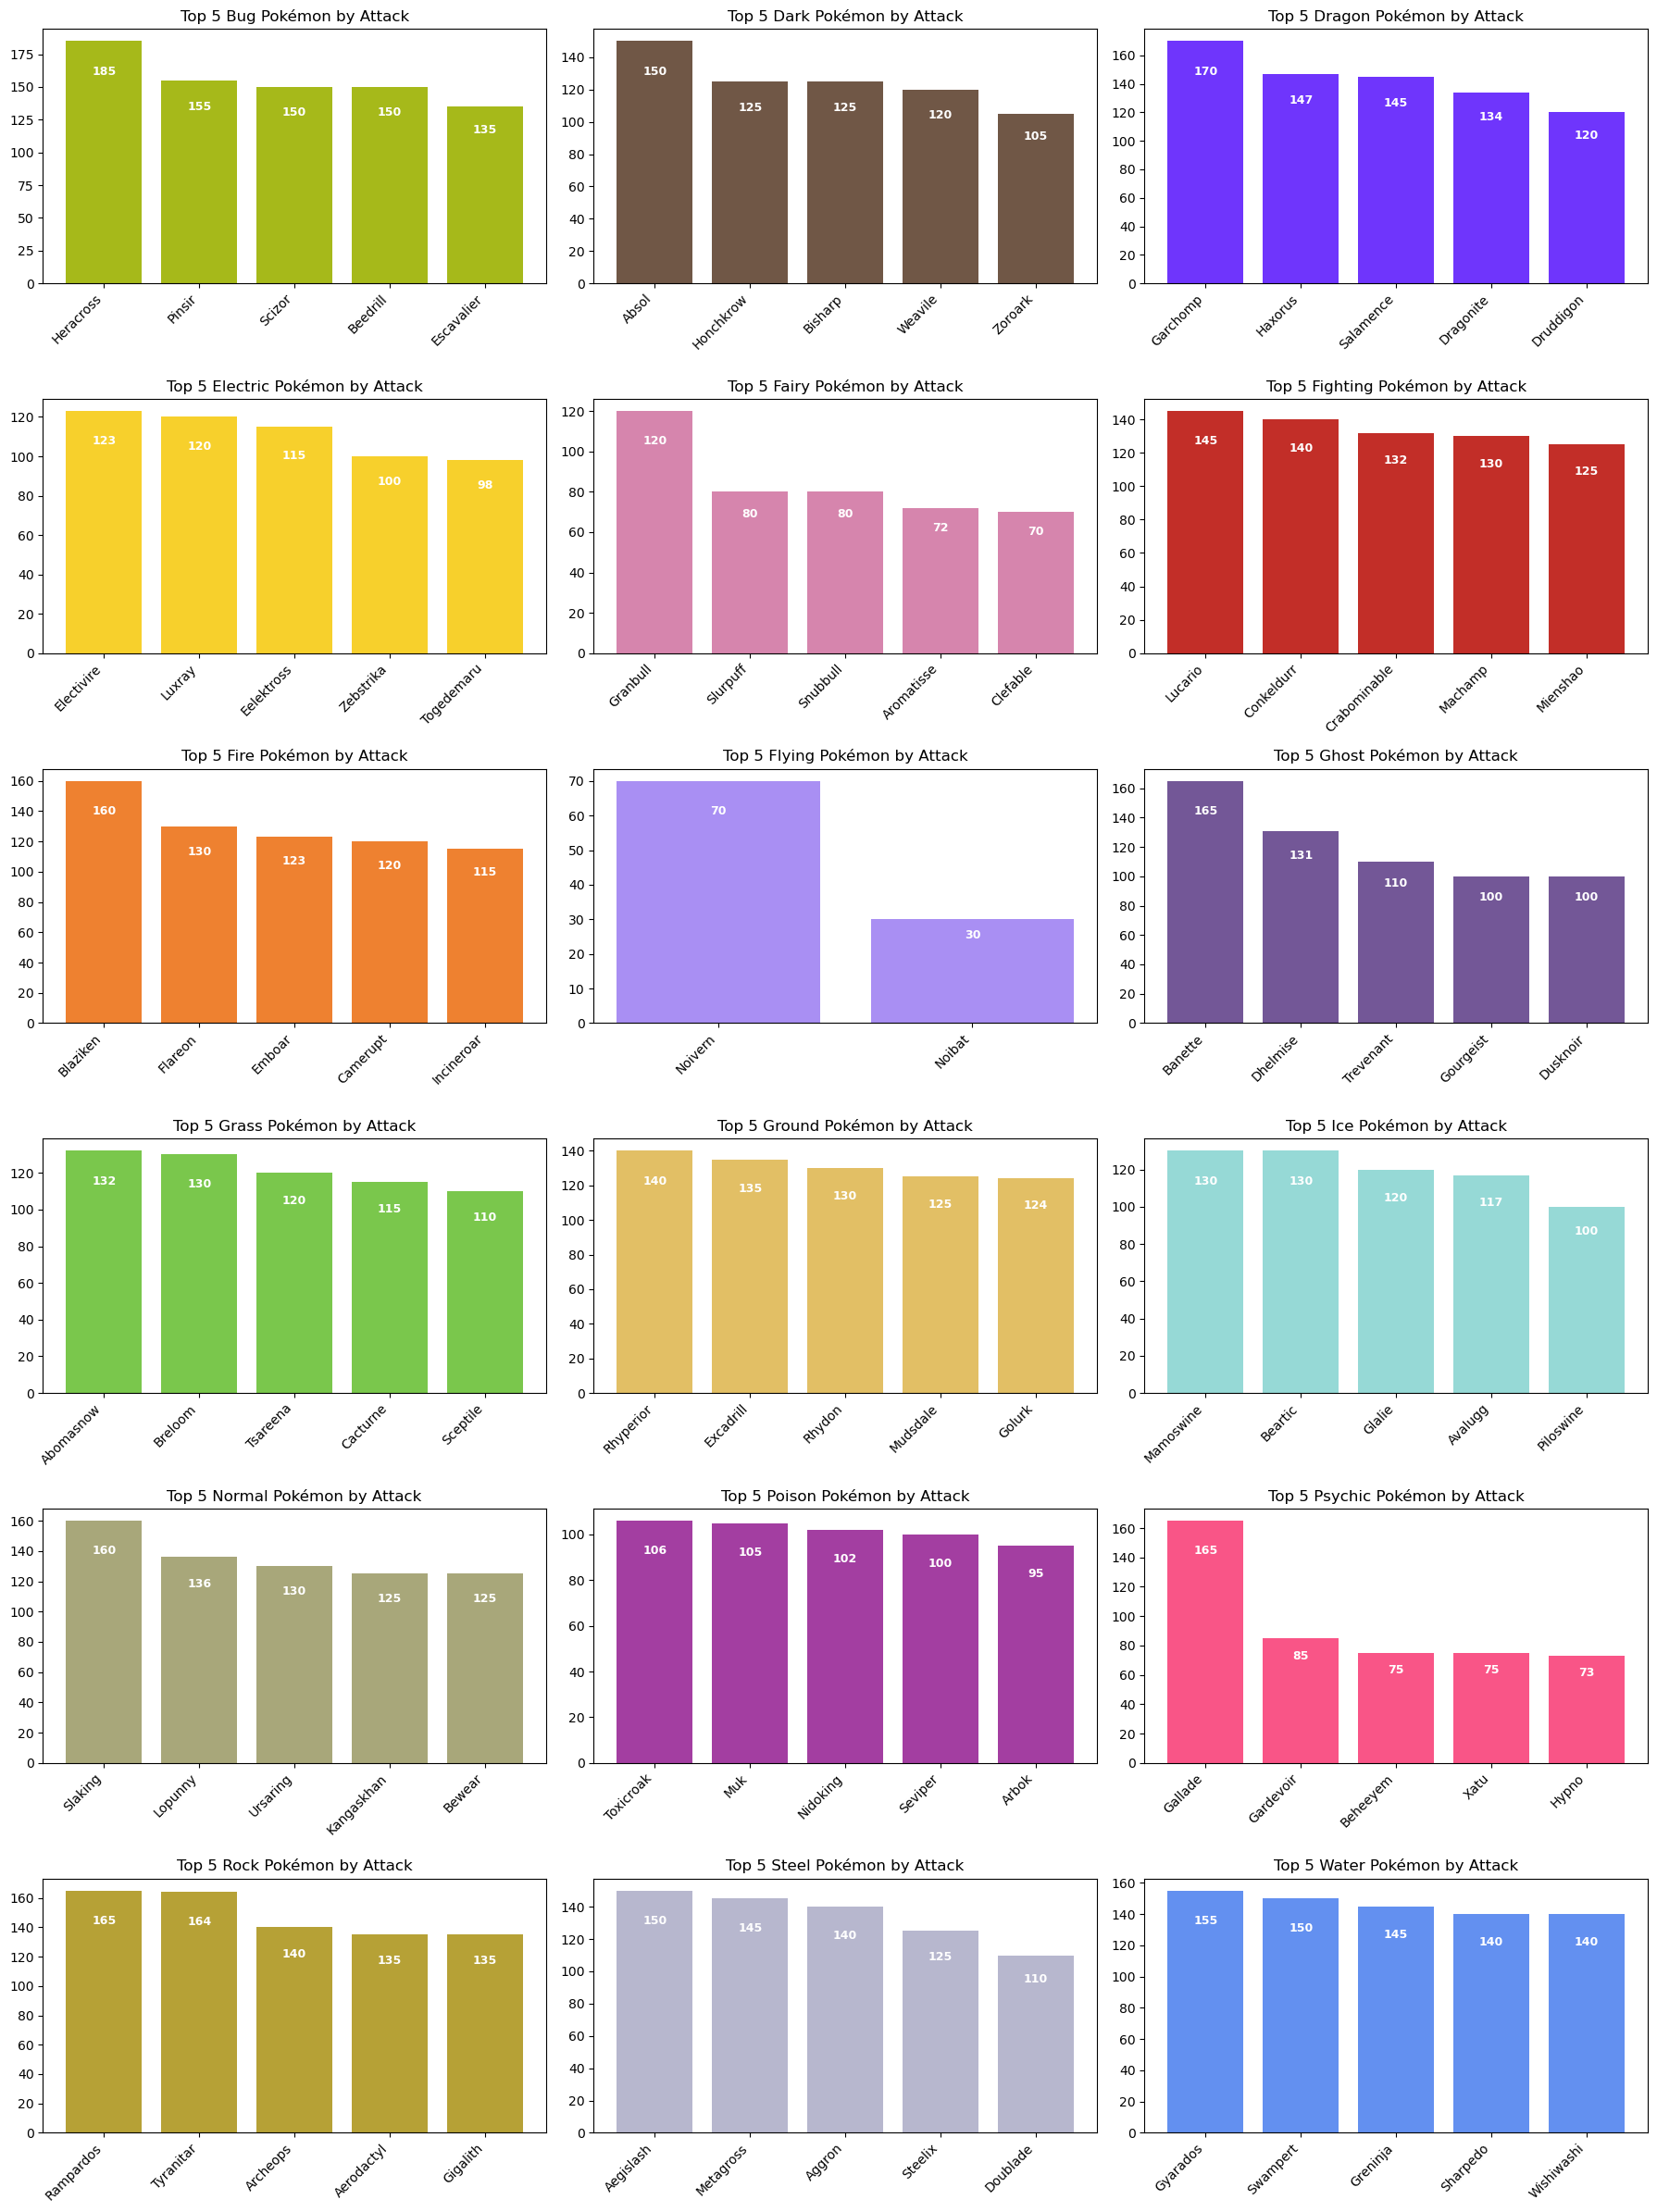

In [125]:
# Create list to hold our best pokemon per stat per type 
attack = []

# Setup grid for subplots
n_cols = 3
n_rows = int(np.ceil(len(types) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Iterate through all types and remove all legendary pokemon
for idx, i in enumerate(types):
    ax = axes[idx]
    attacktype = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    
    # Find the top 5 pokemon per stat per type
    top5i = attacktype.sort_values(by='attack', ascending=False).head(5)
    
    # Assign colors from type_colors dict
    colors = top5i['type1'].map(type_colors)
    
    # Create bar plot
    bars = ax.bar(top5i['name'], top5i['attack'], color=colors)
    ax.set_title(f'Top 5 {i.capitalize()} Pokémon by Attack')
    
    # Set xticks and xticklabels
    ax.set_xticks(range(len(top5i)))
    ax.set_xticklabels(top5i['name'], rotation=45, ha='right')
    
    # Add stat total on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.9,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

    # Add best Pokémon to list
    if not top5i.empty:
        best = top5i.iloc[0]  # first row
        attack.append({'type': i, 'name': best['name'], 'attack': best['attack']})

# Hide any unused subplots
for j in range(len(types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.clf()

In [126]:
#Which pokemon type has on average the best stat and lowest stat range
avg_min_types = []
for i in types:
    avg_min = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    avg_min_types.append({
        'type': i,
        'avg_attack': avg_min['attack'].mean(),
        'min_attack': avg_min['attack'].min()
    })

avg_min_types_df = pd.DataFrame(avg_min_types)
avg_min_types_df

,type,avg_attack,min_attack
0,bug,67.434783,10
1,dark,85.538462,50
2,dragon,98.650000,50
3,electric,67.000000,30
4,fairy,58.058824,20
5,fighting,99.178571,35
6,fire,78.574468,30
7,flying,50.000000,30
8,ghost,70.923077,30
9,grass,70.945946,27


#### Pokémon with highest attack by type <a class='anchor' id='section3_3_1'></a>

Below we'll plot the pokémon with highest attack by type.
* Heracross(Bug) is the strongest physical pokémon overall with 185.

<Figure size 640x480 with 0 Axes>

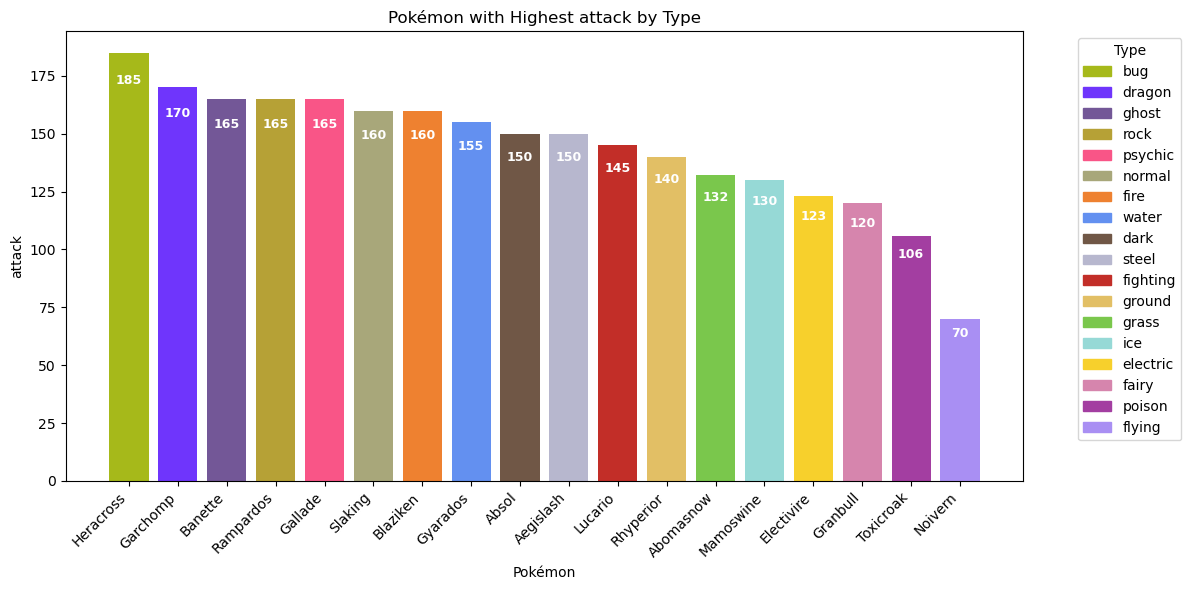

In [127]:
# Create new dataframe from stat list
attack_df = pd.DataFrame(attack)

# Sort descending by attack
attack_df = attack_df.sort_values(by='attack', ascending=False)

# Assign colors based on type
colors = attack_df['type'].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(attack_df['name'], attack_df['attack'], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

# Labels
plt.xlabel('Pokémon')
plt.ylabel('attack')
plt.title('Pokémon with Highest attack by Type')

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in attack_df['type'].unique()]
labels = attack_df['type'].unique()
plt.legend(handles, labels, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

### Exploring Defense stat <a class='anchor' id='section3_4'></a>

Next we'll look into what the defense stat for each type looks like. We'll take the top 5 pokémon of each type and plot them to analyze what the types defense stat look like.

From the first plots we see that:
* The max defense of each type range from 80-230.
* The min defense of each type range from 5-50.
* Shuckle(Bug), Steelix(Steel), Aggron(Steel) are the strongest defensive pokémon with 230.
* Steel pokémon are on average the strongest defensive types with 120. Psychic pokémon are on average the weakest defensive types with 57.
  

<Figure size 640x480 with 0 Axes>

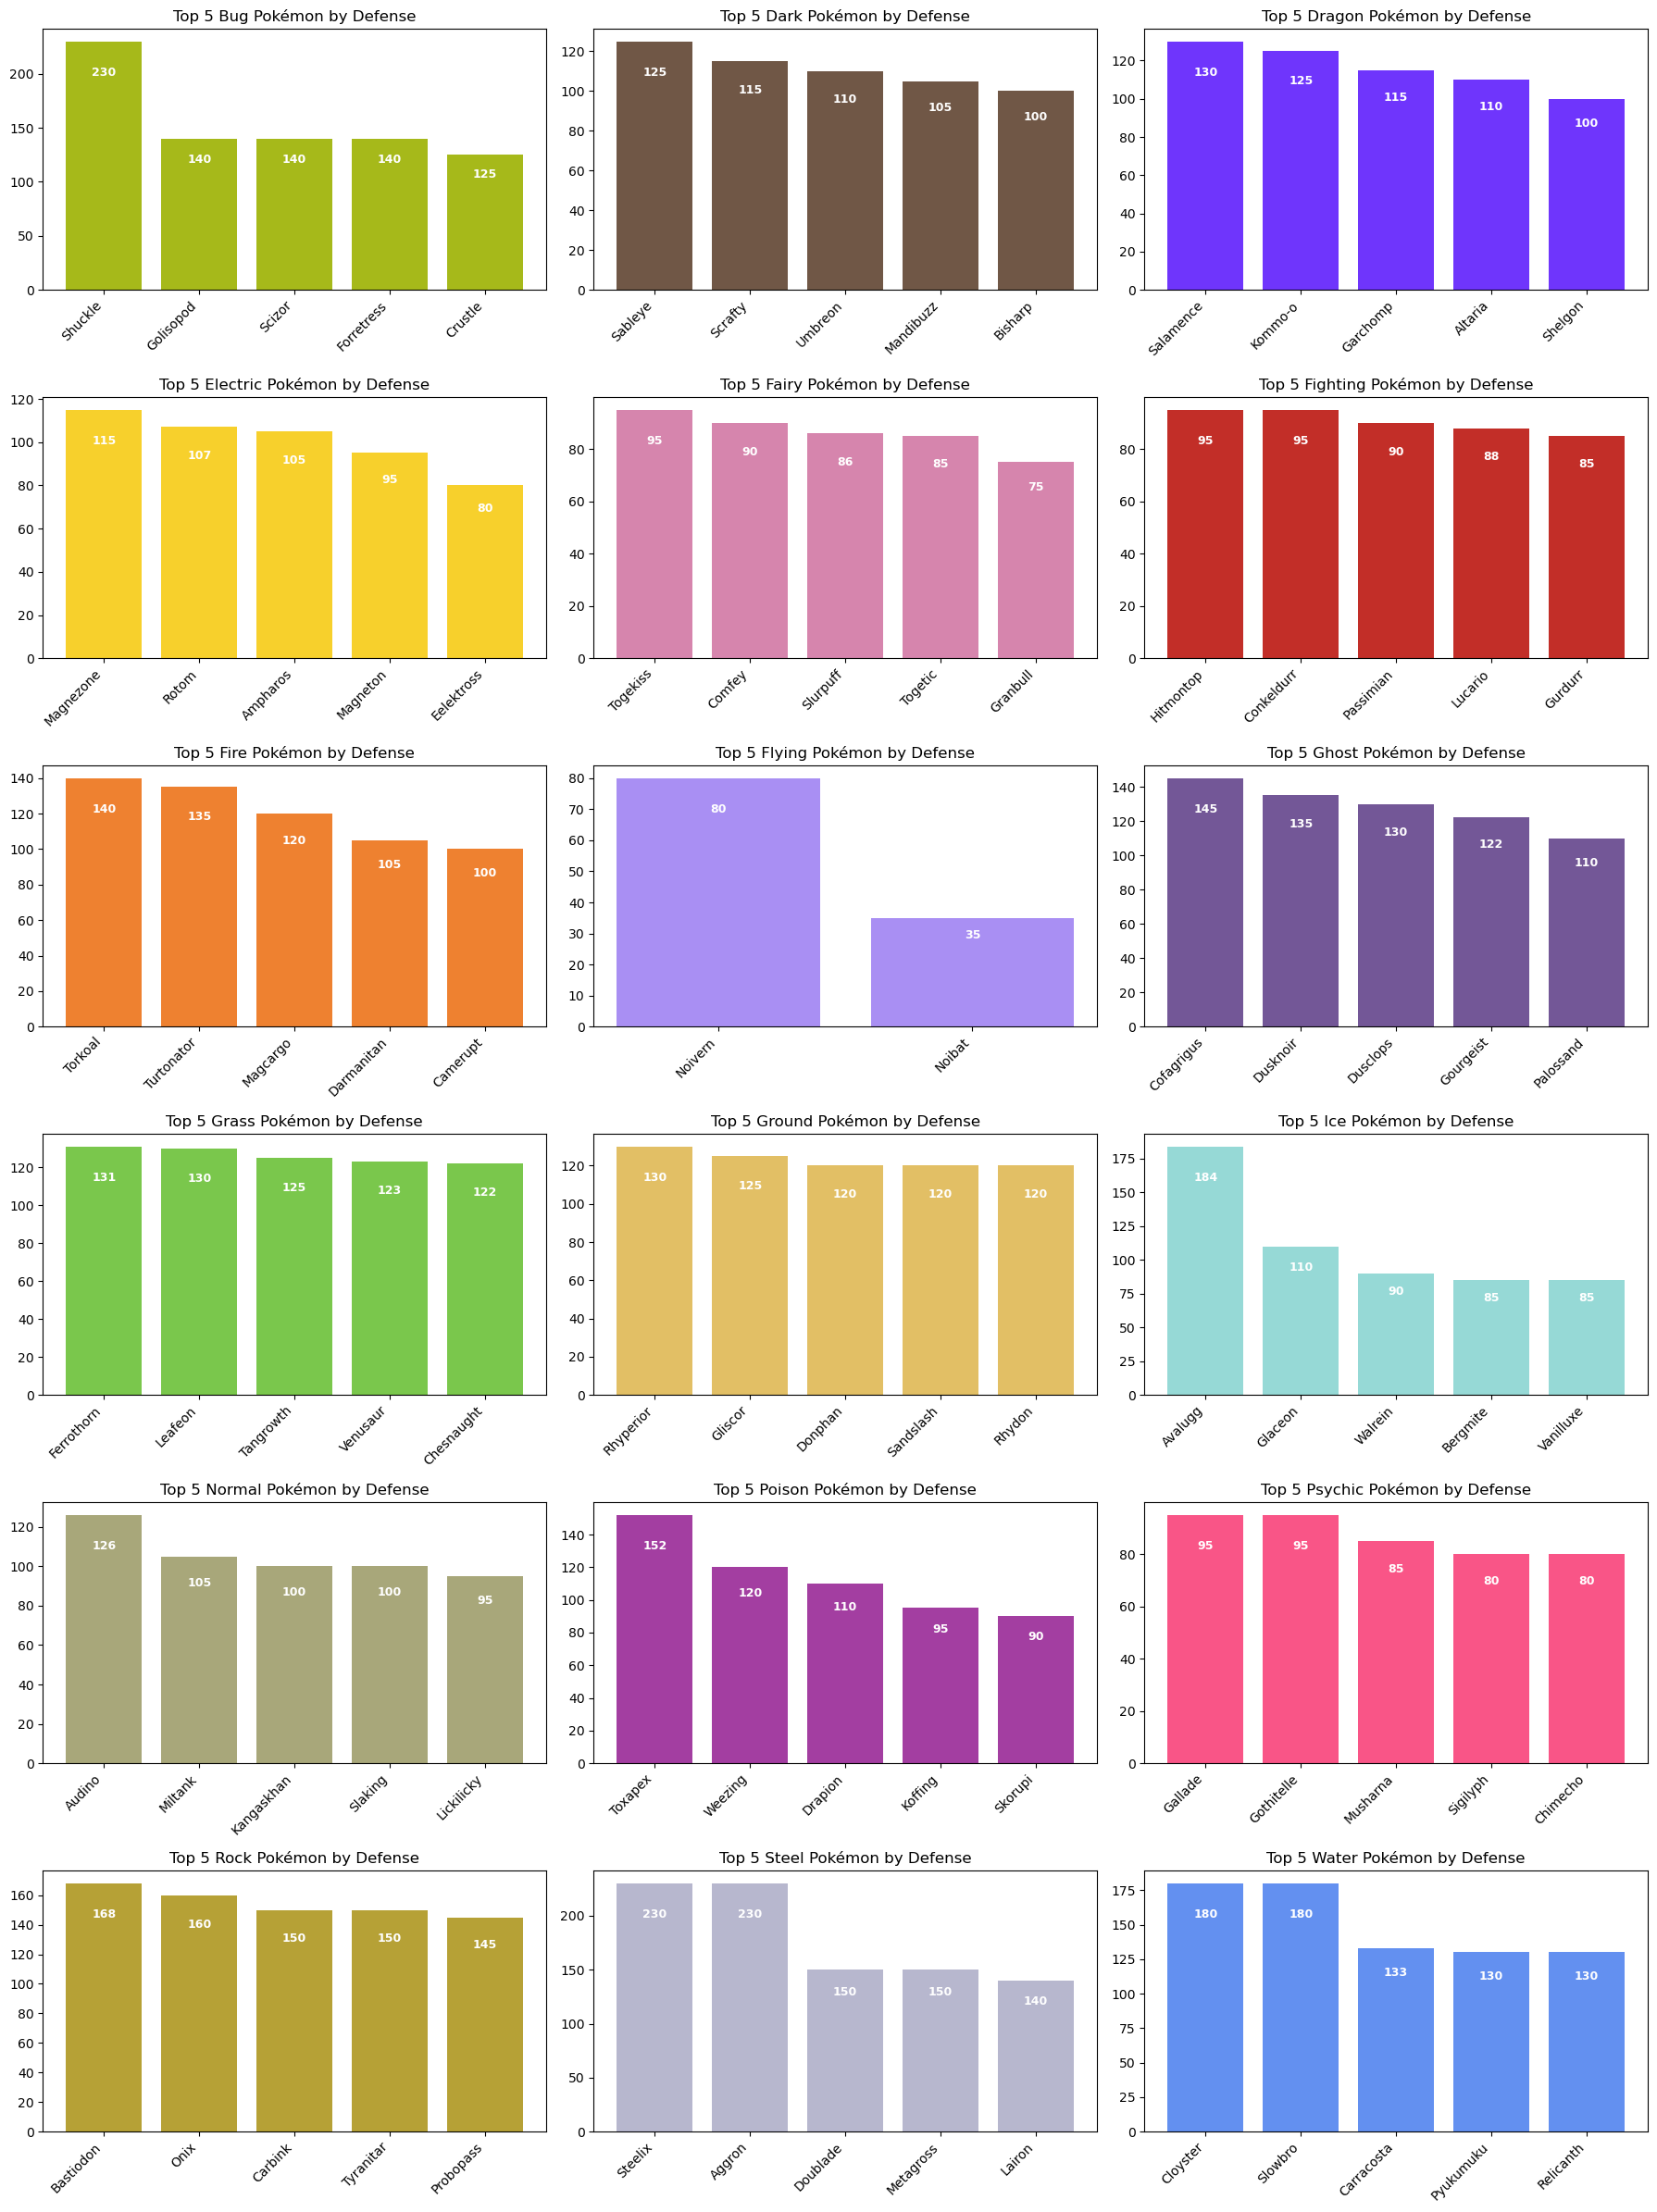

In [128]:
# Create list to hold our best pokemon per stat per type 
defense = []

# Setup grid for subplots
n_cols = 3
n_rows = int(np.ceil(len(types) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Iterate through all types and remove all legendary pokemon
for idx, i in enumerate(types):
    ax = axes[idx]
    defensetype = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    
    # Find the top 5 pokemon per stat per type
    top5i = defensetype.sort_values(by='defense', ascending=False).head(5)
    
    # Assign colors from type_colors dict
    colors = top5i['type1'].map(type_colors)
    
    # Create bar plot
    bars = ax.bar(top5i['name'], top5i['defense'], color=colors)
    ax.set_title(f'Top 5 {i.capitalize()} Pokémon by Defense')
    
    # Set xticks and xticklabels
    ax.set_xticks(range(len(top5i)))
    ax.set_xticklabels(top5i['name'], rotation=45, ha='right')
    
    # Add stat total on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.9,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

    # Add best Pokémon to list
    if not top5i.empty:
        best = top5i.iloc[0]  # first row
        defense.append({'type': i, 'name': best['name'], 'defense': best['defense']})

# Hide any unused subplots
for j in range(len(types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.clf()

In [129]:
#Which pokemon type has on average the best stat and lowest stat range
avg_min_types = []
for i in types:
    avg_min = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    avg_min_types.append({
        'type': i,
        'avg_defense': avg_min['defense'].mean(),
        'min_defense': avg_min['defense'].min()
    })

avg_min_types_df = pd.DataFrame(avg_min_types)
avg_min_types_df

,type,avg_defense,min_defense
0,bug,70.000000,30
1,dark,69.500000,30
2,dragon,78.900000,35
3,electric,59.558824,15
4,fairy,66.588235,28
5,fighting,66.392857,30
6,fire,64.553191,37
7,flying,57.500000,35
8,ghost,78.730769,30
9,grass,69.391892,30


#### Pokémon with highest defense by type <a class='anchor' id='section3_4_1'></a>

Below we'll plot the pokémon with highest defense by type.
* Shuckle(Bug), Steelix(Steel), Aggron(Steel) are the strongest defensive pokémon with 230.

<Figure size 640x480 with 0 Axes>

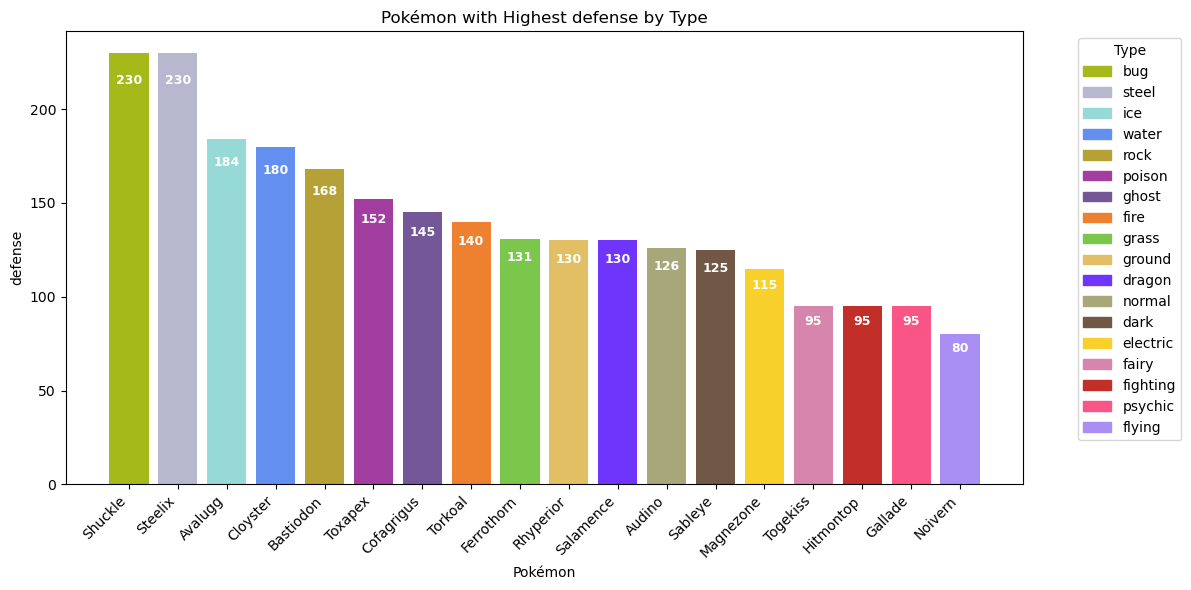

In [130]:
# Create new dataframe from stat list
defense_df = pd.DataFrame(defense)

# Sort descending by defense
defense_df = defense_df.sort_values(by='defense', ascending=False)

# Assign colors based on type
colors = defense_df['type'].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(defense_df['name'], defense_df['defense'], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

# Labels
plt.xlabel('Pokémon')
plt.ylabel('defense')
plt.title('Pokémon with Highest defense by Type')

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in defense_df['type'].unique()]
labels = defense_df['type'].unique()
plt.legend(handles, labels, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

### Exploring Special Attack stat <a class='anchor' id='section3_5'></a>

Next we'll look into what the special attack stat for each type looks like. We'll take the top 5 pokémon of each type and plot them to analyze what the types special attack stat look like.

From the first plots we see that:
* The max special attack of each type range from 81-175.
* The min special attack of each type range from 10-45.
* Alakazam(Psychic) is strongest special offensive pokémon with 175.
* Psychic pokémon are on average the strongest special offensive types with 86. Ground pokémon are on average the weakest special offensive types with 46.
  

<Figure size 640x480 with 0 Axes>

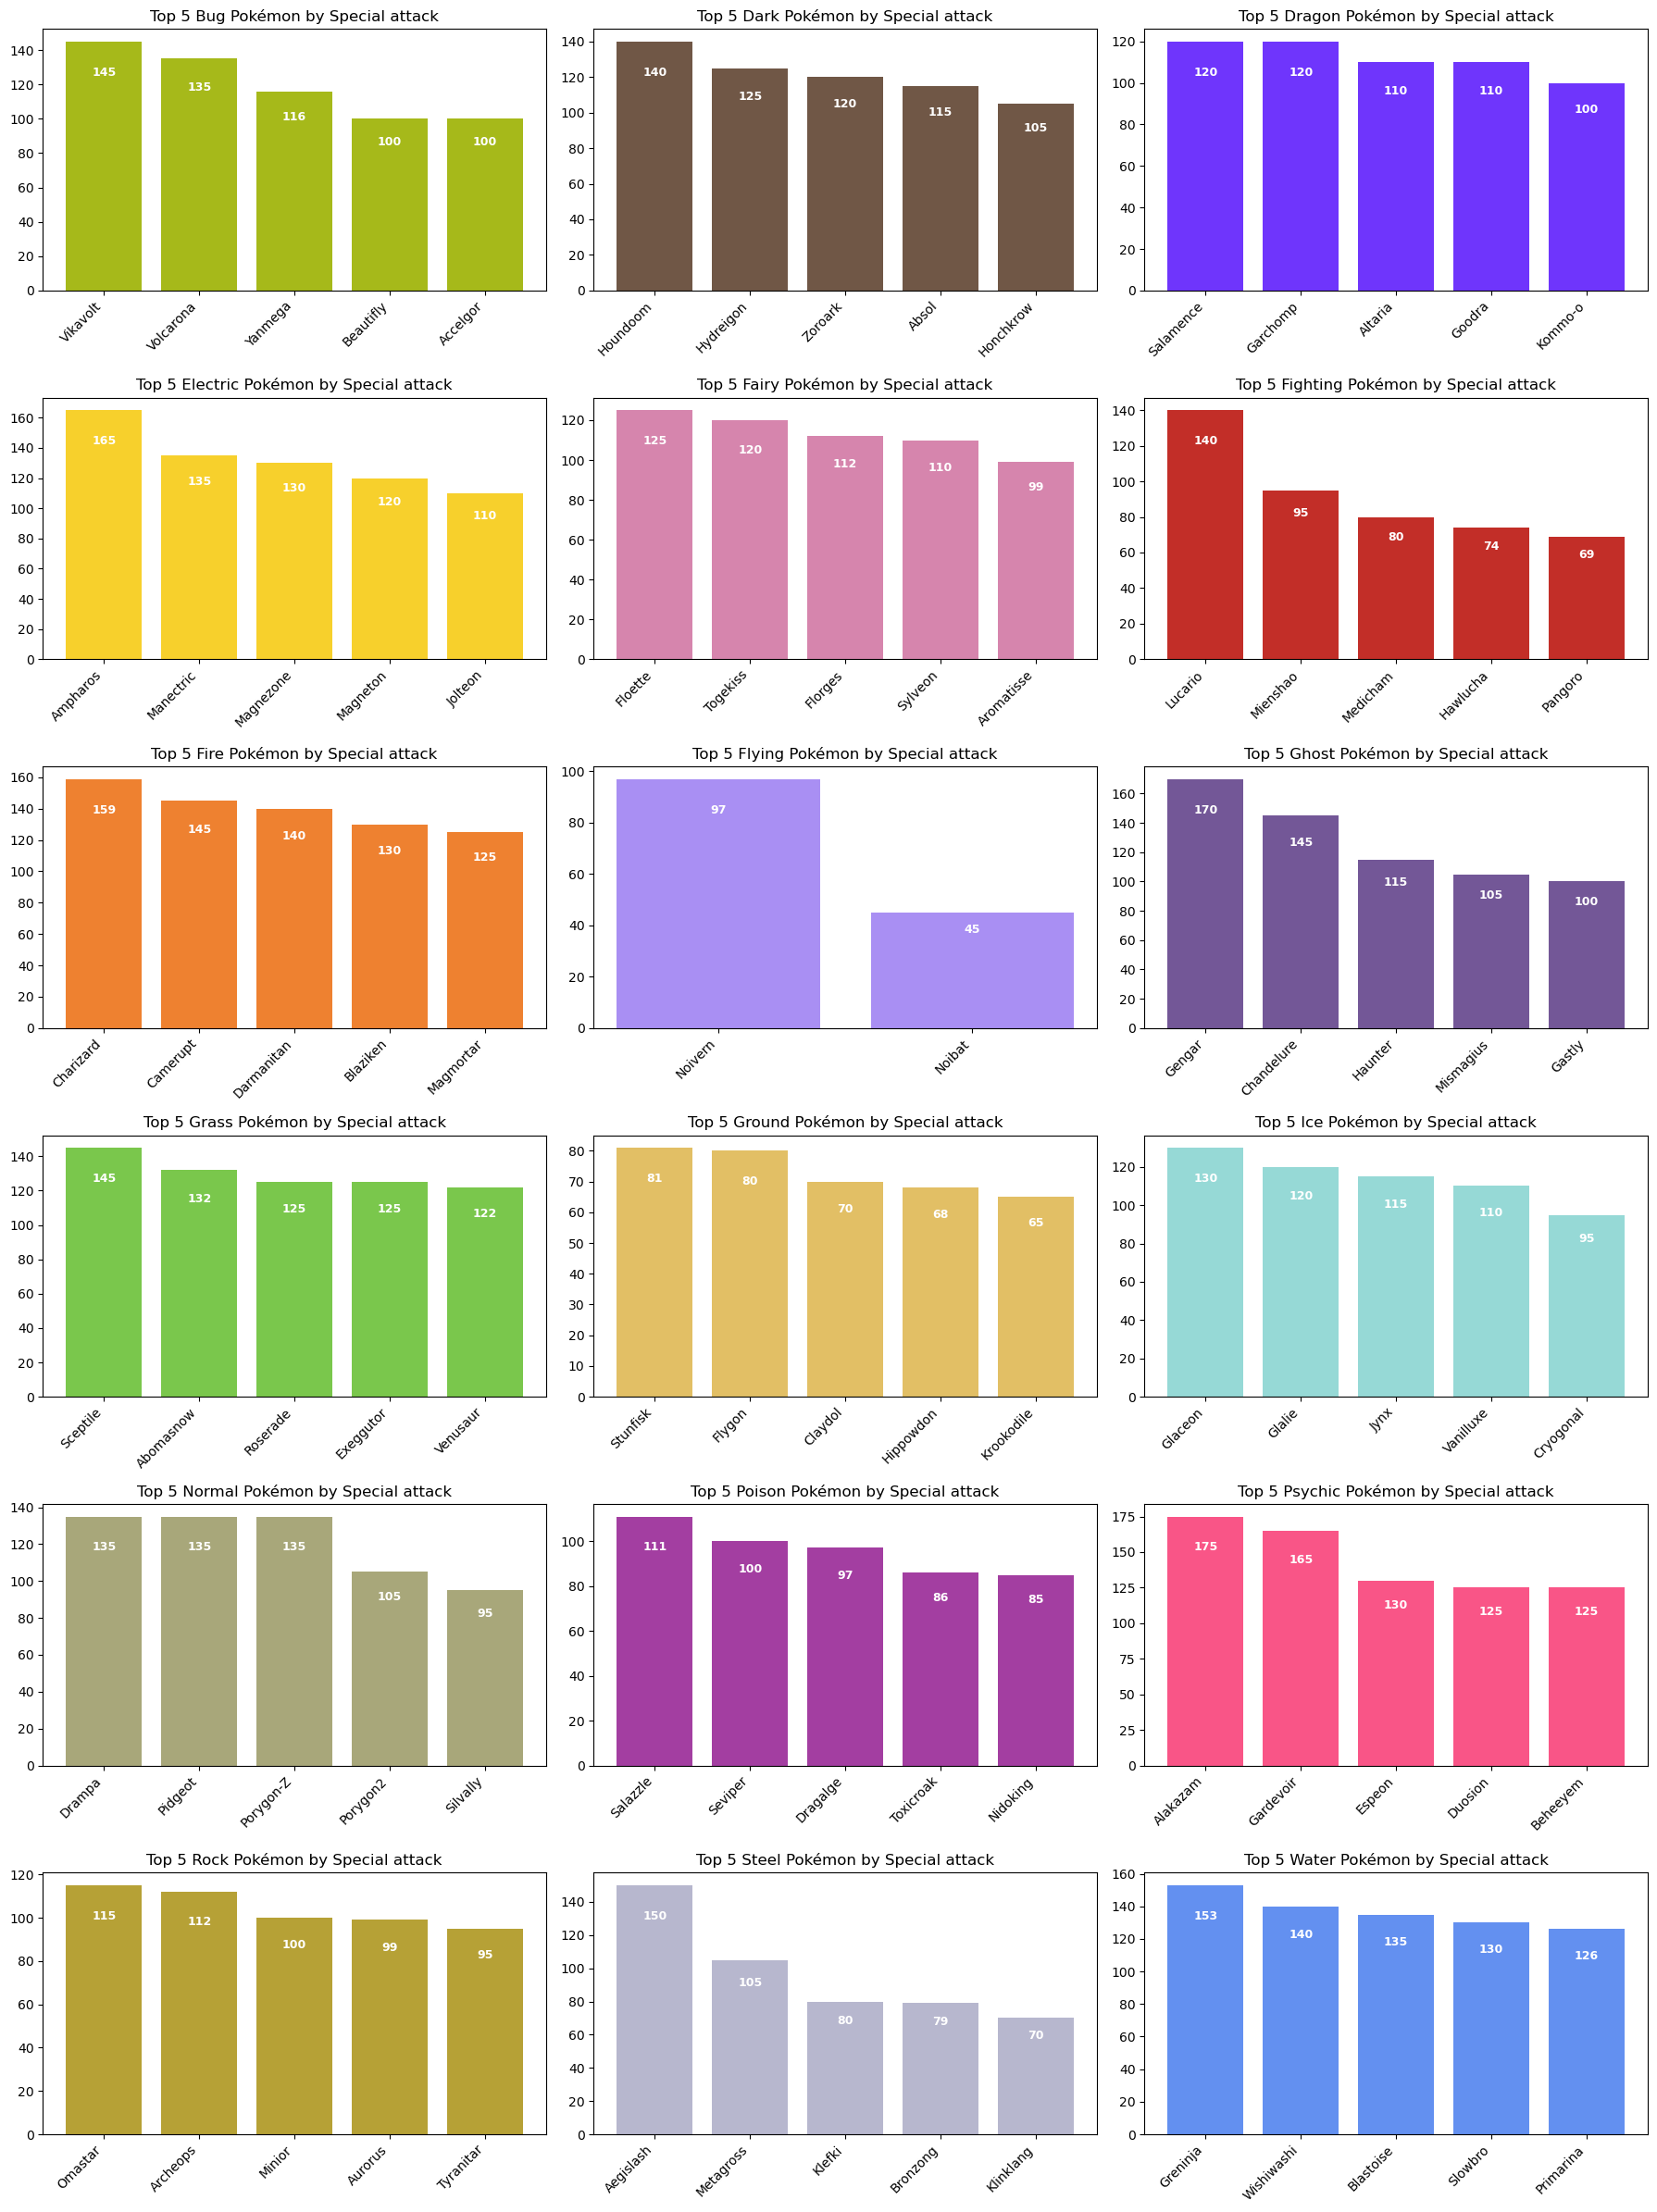

In [131]:
# Create list to hold our best pokemon per stat per type 
sp_attack = []

# Setup grid for subplots
n_cols = 3
n_rows = int(np.ceil(len(types) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Iterate through all types and remove all legendary pokemon
for idx, i in enumerate(types):
    ax = axes[idx]
    sp_attacktype = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    
    # Find the top 5 pokemon per stat per type
    top5i = sp_attacktype.sort_values(by='sp_attack', ascending=False).head(5)
    
    # Assign colors from type_colors dict
    colors = top5i['type1'].map(type_colors)
    
    # Create bar plot
    bars = ax.bar(top5i['name'], top5i['sp_attack'], color=colors)
    ax.set_title(f'Top 5 {i.capitalize()} Pokémon by Special attack')
    
    # Set xticks and xticklabels
    ax.set_xticks(range(len(top5i)))
    ax.set_xticklabels(top5i['name'], rotation=45, ha='right')
    
    # Add stat total on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.9,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

    # Add best Pokémon to list
    if not top5i.empty:
        best = top5i.iloc[0]  # first row
        sp_attack.append({'type': i, 'name': best['name'], 'sp_attack': best['sp_attack']})

# Hide any unused subplots
for j in range(len(types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.clf()

In [132]:
#Which pokemon type has on average the best stat and lowest stat range
avg_min_types = []
for i in types:
    avg_min = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    avg_min_types.append({
        'type': i,
        'avg_sp_attack': avg_min['sp_attack'].mean(),
        'min_sp_attack': avg_min['sp_attack'].min()
    })

avg_min_types_df = pd.DataFrame(avg_min_types)
avg_min_types_df

,type,avg_sp_attack,min_sp_attack
0,bug,54.623188,10
1,dark,69.153846,30
2,dragon,70.400000,30
3,electric,81.205882,35
4,fairy,78.588235,40
5,fighting,50.107143,20
6,fire,84.617021,15
7,flying,71.000000,45
8,ghost,81.000000,30
9,grass,73.554054,24


#### Pokémon with highest special attack by type <a class='anchor' id='section3_5_1'></a>

Below we'll plot the pokémon with highest special attack by type.
* Alakazam(Psychic) is highest special attack pokémon with 175.

<Figure size 640x480 with 0 Axes>

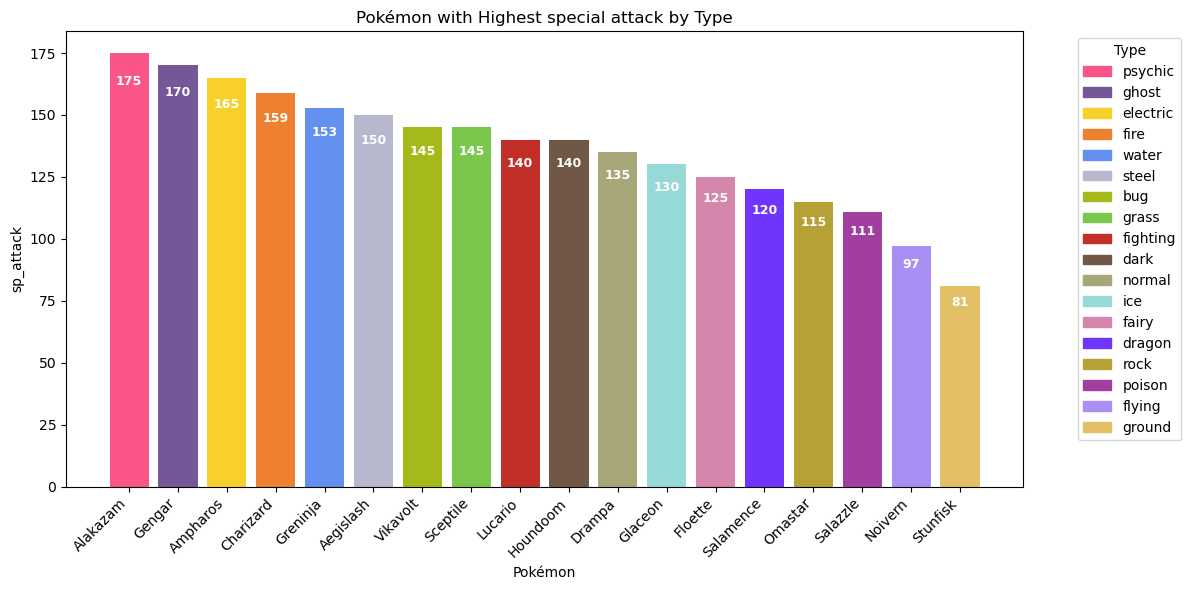

In [133]:
# Create new dataframe from stat list
sp_attack_df = pd.DataFrame(sp_attack)

# Sort descending by sp_attack
sp_attack_df = sp_attack_df.sort_values(by='sp_attack', ascending=False)

# Assign colors based on type
colors = sp_attack_df['type'].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sp_attack_df['name'], sp_attack_df['sp_attack'], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

# Labels
plt.xlabel('Pokémon')
plt.ylabel('sp_attack')
plt.title('Pokémon with Highest special attack by Type')

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in sp_attack_df['type'].unique()]
labels = sp_attack_df['type'].unique()
plt.legend(handles, labels, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

### Exploring Special Defense stat <a class='anchor' id='section3_6'></a>

Next we'll look into what the special defense stat for each type looks like. We'll take the top 5 pokémon of each type and plot them to analyze what the types special defense stat look like.

From the first plots we see that:
* The max special defense of each type range from 80-230.
* The min special defense of each type range from 20-40.
* Shuckle(Bug) is the strongest special defensive pokémon with 230.
* Fairy pokémon are on average the strongest special defensive types with 87. Ground pokémon are on average the weakest special defensive types with 60.
  

<Figure size 640x480 with 0 Axes>

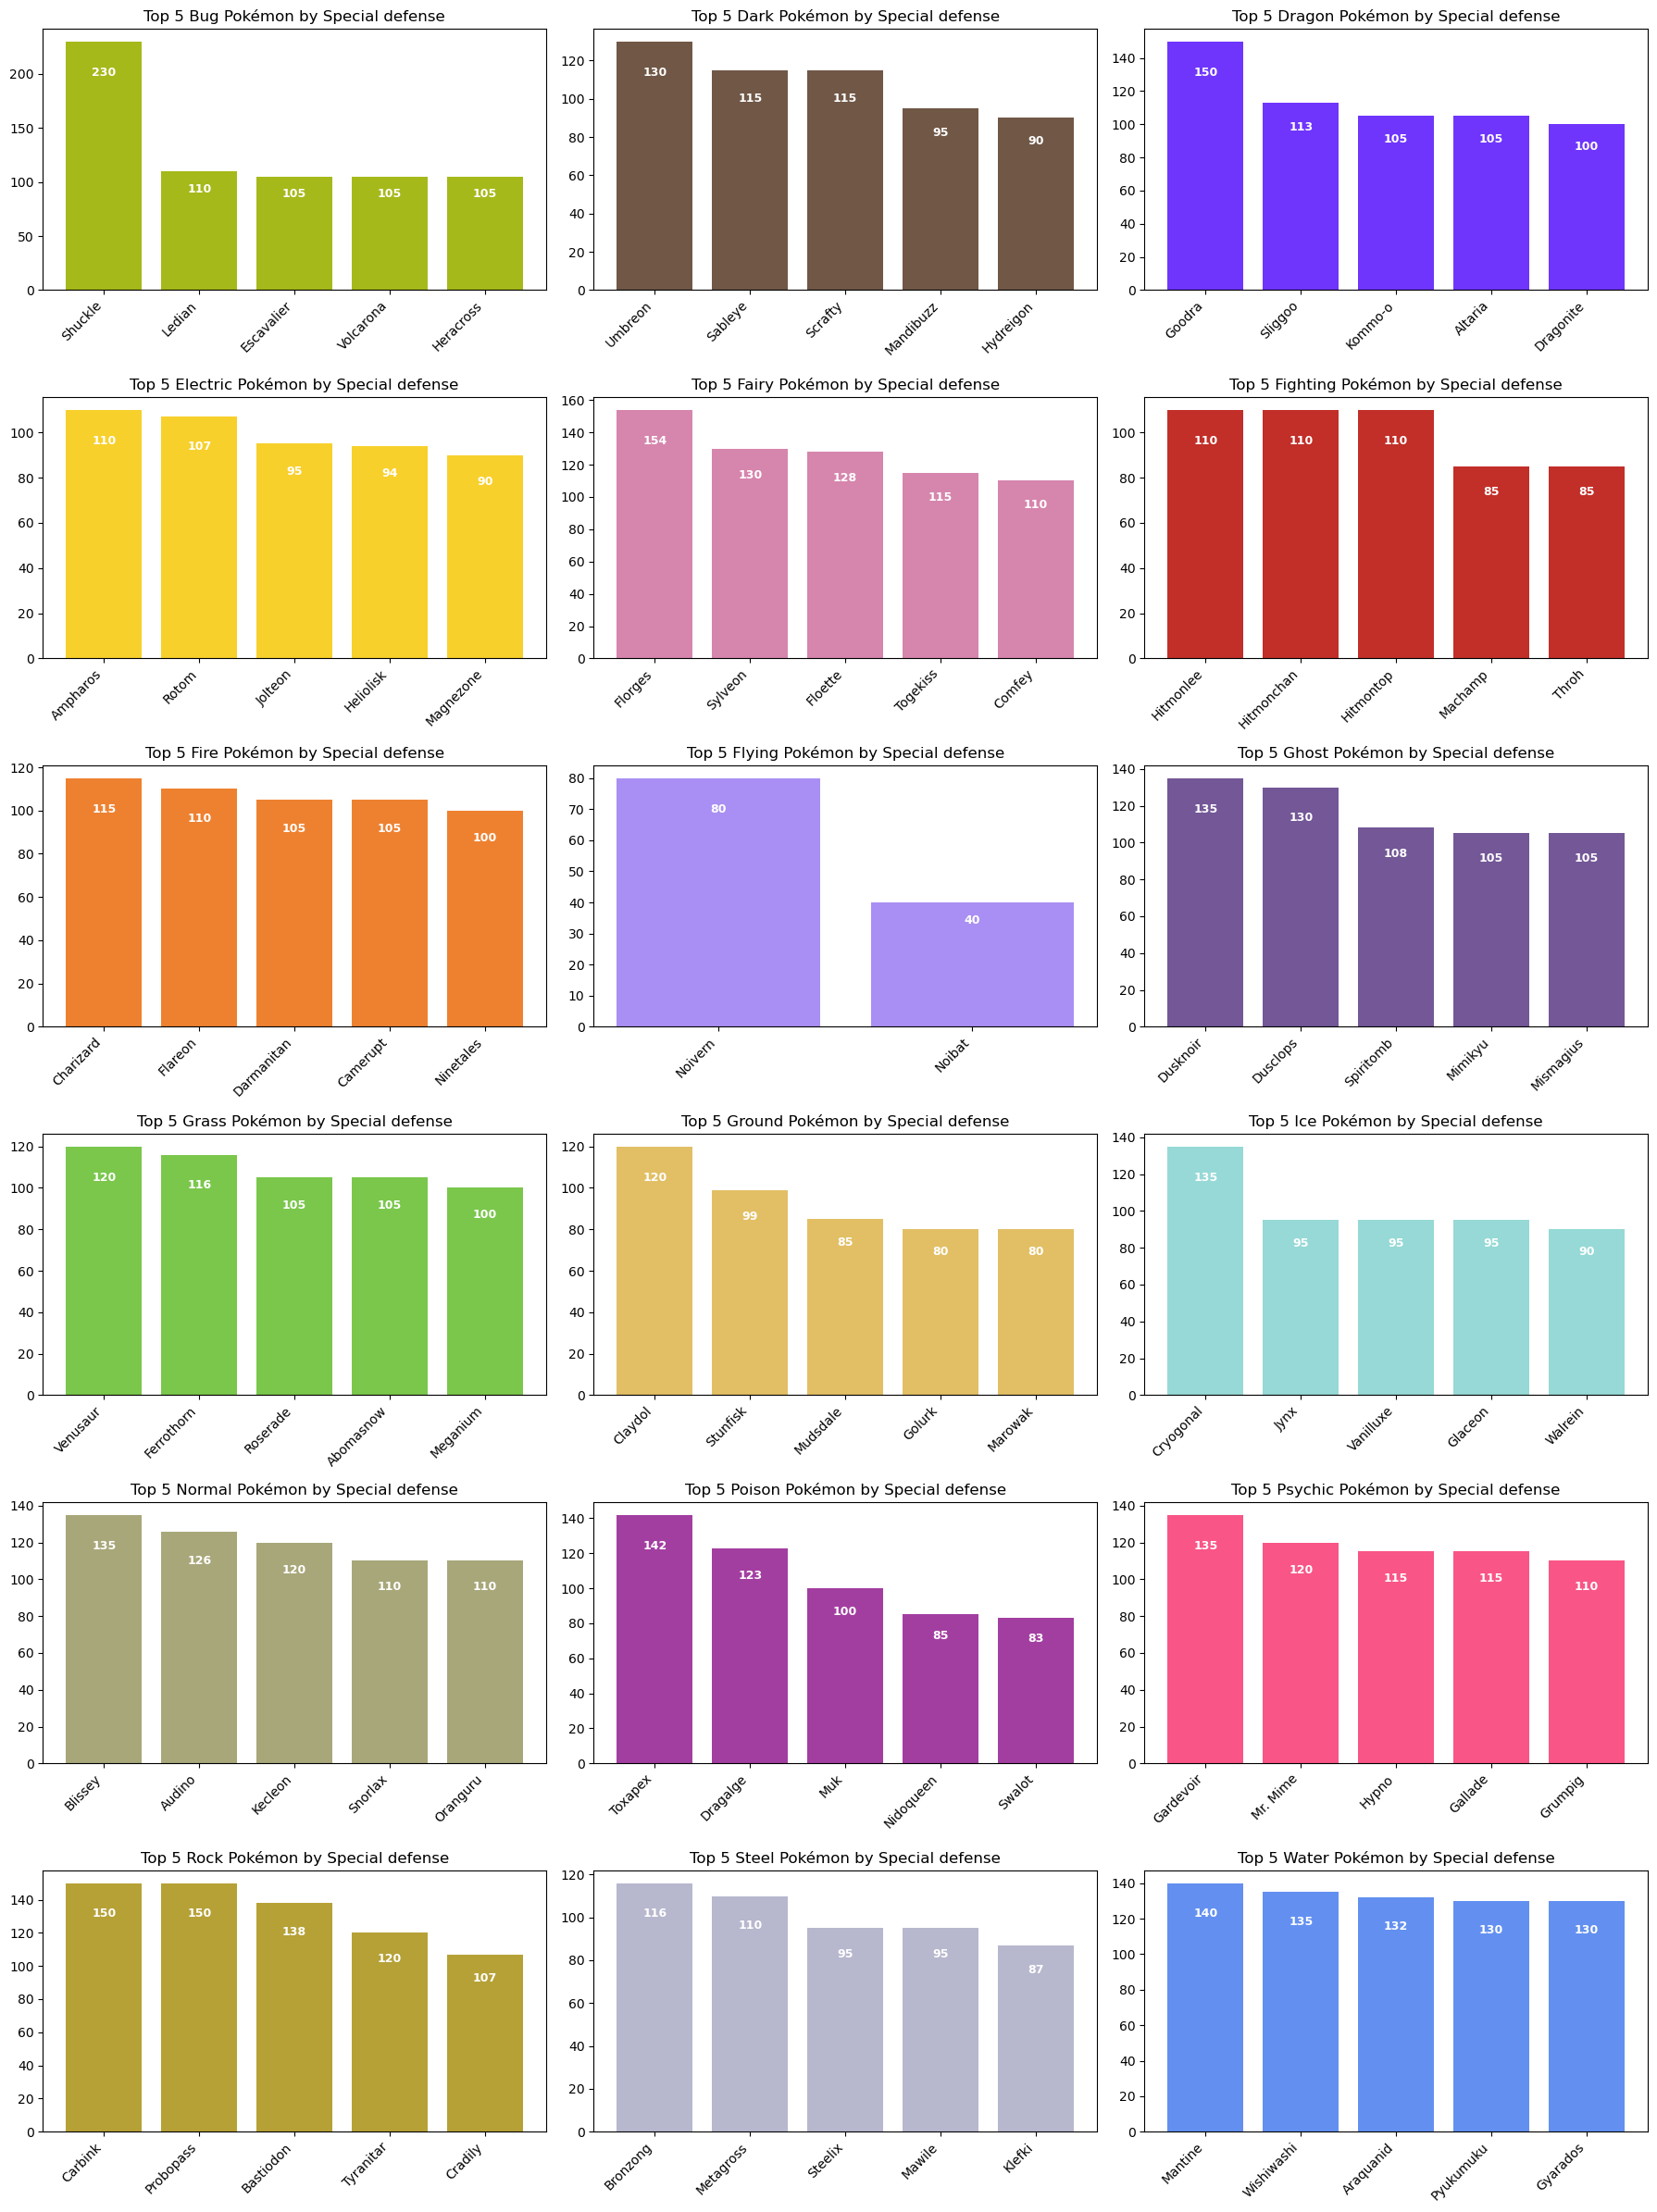

In [134]:
# Create list to hold our best pokemon per stat per type 
sp_defense = []

# Setup grid for subplots
n_cols = 3
n_rows = int(np.ceil(len(types) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Iterate through all types and remove all legendary pokemon
for idx, i in enumerate(types):
    ax = axes[idx]
    sp_defensetype = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    
    # Find the top 5 pokemon per stat per type
    top5i = sp_defensetype.sort_values(by='sp_defense', ascending=False).head(5)
    
    # Assign colors from type_colors dict
    colors = top5i['type1'].map(type_colors)
    
    # Create bar plot
    bars = ax.bar(top5i['name'], top5i['sp_defense'], color=colors)
    ax.set_title(f'Top 5 {i.capitalize()} Pokémon by Special defense')
    
    # Set xticks and xticklabels
    ax.set_xticks(range(len(top5i)))
    ax.set_xticklabels(top5i['name'], rotation=45, ha='right')
    
    # Add stat total on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.9,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

    # Add best Pokémon to list
    if not top5i.empty:
        best = top5i.iloc[0]  # first row
        sp_defense.append({'type': i, 'name': best['name'], 'sp_defense': best['sp_defense']})

# Hide any unused subplots
for j in range(len(types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.clf()

In [135]:
#Which pokemon type has on average the best stat and lowest stat range
avg_min_types = []
for i in types:
    avg_min = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    avg_min_types.append({
        'type': i,
        'avg_sp_defense': avg_min['sp_defense'].mean(),
        'min_sp_defense': avg_min['sp_defense'].min()
    })

avg_min_types_df = pd.DataFrame(avg_min_types)
avg_min_types_df

,type,avg_sp_defense,min_sp_defense
0,bug,62.550725,20
1,dark,67.769231,30
2,dragon,74.900000,30
3,electric,68.117647,32
4,fairy,87.176471,40
5,fighting,63.428571,30
6,fire,68.297872,40
7,flying,60.000000,40
8,ghost,77.461538,33
9,grass,68.513514,30


#### Pokémon with highest special defense by type <a class='anchor' id='section3_6_1'></a>

Below we'll plot the pokémon with the highest special defense by type.
* Shuckle(Bug) is the strongest special defensive pokémon with 230.

<Figure size 640x480 with 0 Axes>

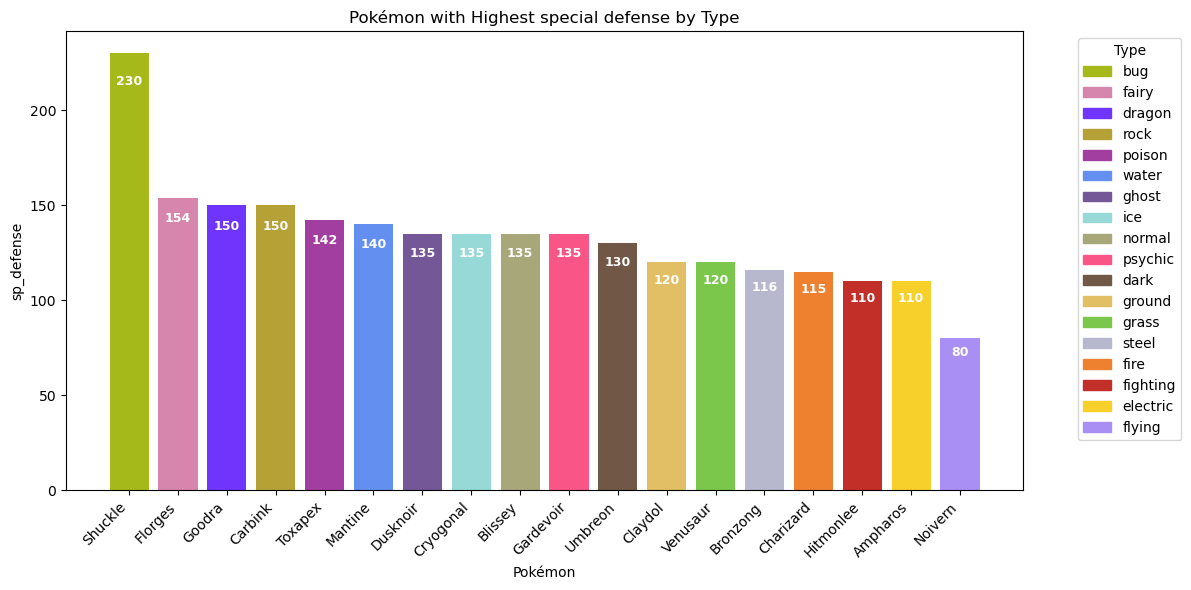

In [136]:
# Create new dataframe from stat list
sp_defense_df = pd.DataFrame(sp_defense)

# Sort descending by sp_defense
sp_defense_df = sp_defense_df.sort_values(by='sp_defense', ascending=False)

# Assign colors based on type
colors = sp_defense_df['type'].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sp_defense_df['name'], sp_defense_df['sp_defense'], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

# Labels
plt.xlabel('Pokémon')
plt.ylabel('sp_defense')
plt.title('Pokémon with Highest special defense by Type')

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in sp_defense_df['type'].unique()]
labels = sp_defense_df['type'].unique()
plt.legend(handles, labels, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

### Exploring Total base stats<a class='anchor' id='section3_7'></a>

Next we'll look into what the total base stat for each type looks like. We'll take the top 5 pokémon of each type and plot them to analyze what the types total base stat look like.

From the first plots we see that:
* The max total base stat of each type range from 535-700.
* The min total base stat of each type range from 180-300.
* Salamence(Dragon), Garchomp(Dragon), Tyranitar(Rock) and Metagross(Steel) are tied as the highest total base stats pokémon at 700.
* Dragon pokémon have on average the highest total base stat of any types with 458. Bug pokémon have on average the lowest total base stats of any types with 371.
  

<Figure size 640x480 with 0 Axes>

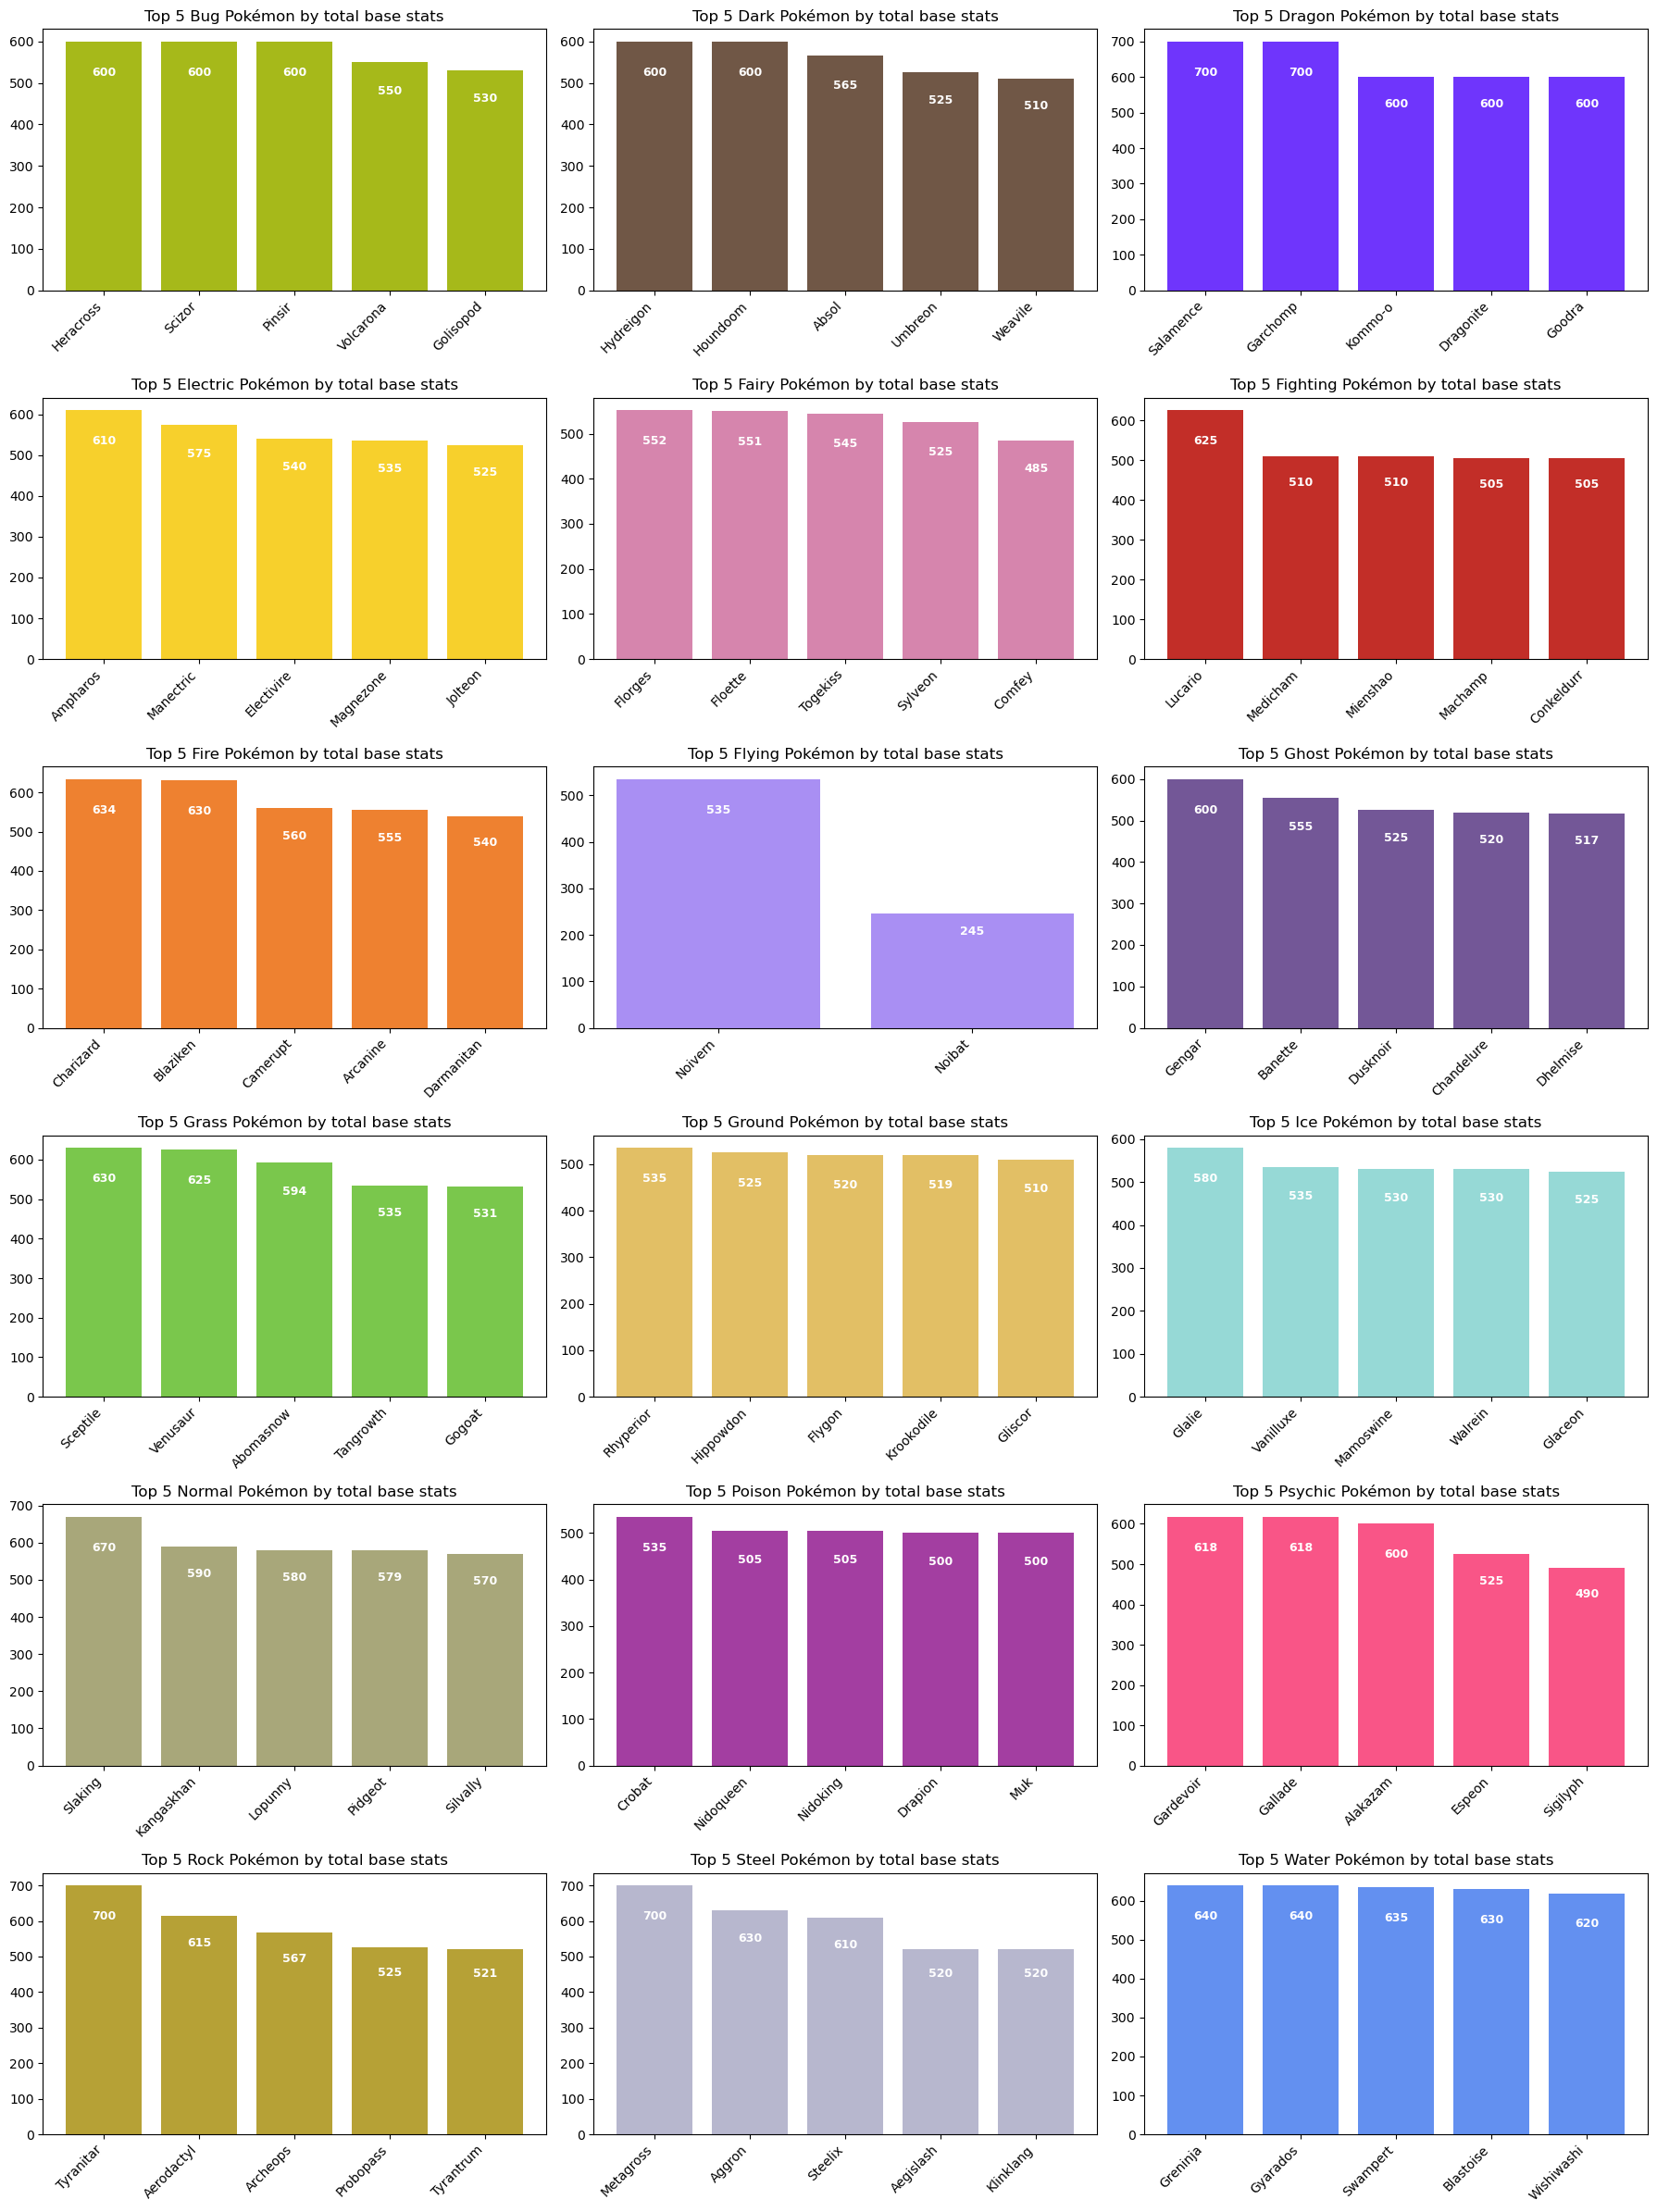

In [137]:
# Create list to hold our best pokemon per stat per type 
base_total = []

# Setup grid for subplots
n_cols = 3
n_rows = int(np.ceil(len(types) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Iterate through all types and remove all legendary pokemon
for idx, i in enumerate(types):
    ax = axes[idx]
    base_totaltype = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    
    # Find the top 5 pokemon per stat per type
    top5i = base_totaltype.sort_values(by='base_total', ascending=False).head(5)
    
    # Assign colors from type_colors dict
    colors = top5i['type1'].map(type_colors)
    
    # Create bar plot
    bars = ax.bar(top5i['name'], top5i['base_total'], color=colors)
    ax.set_title(f'Top 5 {i.capitalize()} Pokémon by total base stats')
    
    # Set xticks and xticklabels
    ax.set_xticks(range(len(top5i)))
    ax.set_xticklabels(top5i['name'], rotation=45, ha='right')
    
    # Add stat total on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.9,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

    # Add best Pokémon to list
    if not top5i.empty:
        best = top5i.iloc[0]  # first row
        base_total.append({'type': i, 'name': best['name'], 'base_total': best['base_total']})

# Hide any unused subplots
for j in range(len(types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.clf()

In [138]:
#Which pokemon type has on average the best stat and lowest stat range
avg_min_types = []
for i in types:
    avg_min = pokedex[(pokedex['type1'] == i) & (pokedex['is_legendary'] == 0)]
    avg_min_types.append({
        'type': i,
        'avg_base_stats': avg_min['base_total'].mean(),
        'min_base_stats': avg_min['base_total'].min()
    })

avg_min_types_df = pd.DataFrame(avg_min_types)
avg_min_types_df

,type,avg_base_stats,min_base_stats
0,bug,371.753623,194
1,dark,430.500000,220
2,dragon,458.350000,300
3,electric,415.588235,205
4,fairy,412.294118,218
5,fighting,414.821429,210
6,fire,433.893617,250
7,flying,390.000000,245
8,ghost,425.269231,275
9,grass,403.527027,180


#### Pokémon with highest total base stats by type <a class='anchor' id='section3_7_1'></a>

Below we'll plot the pokémon with highest total base stats by type.
* Salamence(Dragon), Garchomp(Dragon), Tyranitar(Rock) and Metagross(Steel) are tied as the highest total base stats pokémon.

<Figure size 640x480 with 0 Axes>

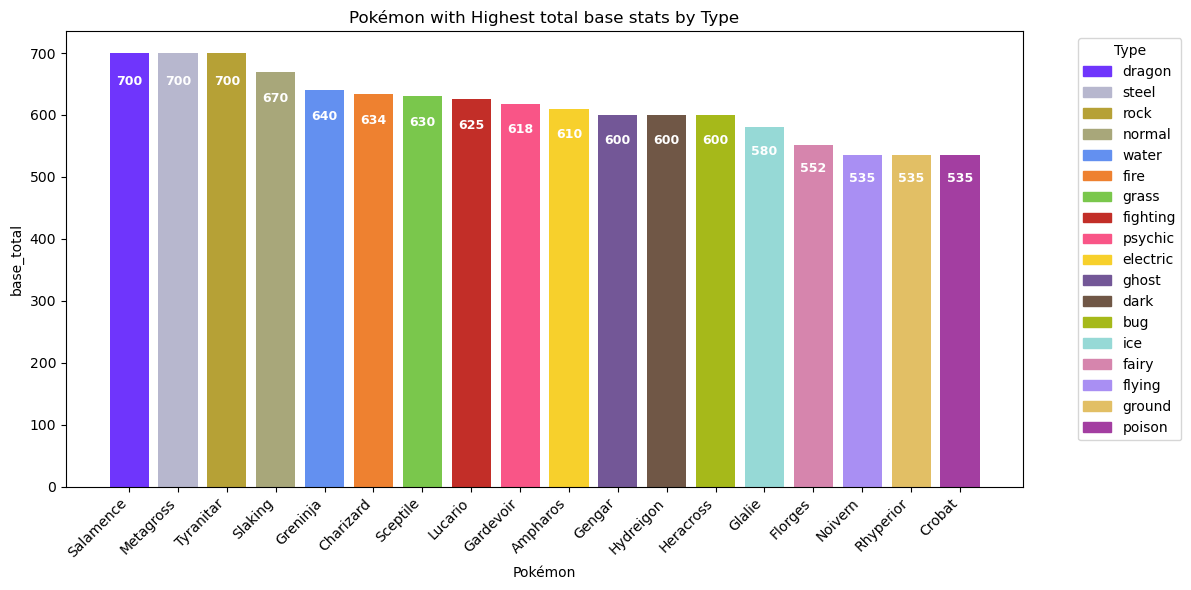

In [139]:
# Create new dataframe from stat list
base_total_df = pd.DataFrame(base_total)

# Sort descending by base_total
base_total_df = base_total_df.sort_values(by='base_total', ascending=False)

# Assign colors based on type
colors = base_total_df['type'].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(base_total_df['name'], base_total_df['base_total'], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        str(int(height)),                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

# Labels
plt.xlabel('Pokémon')
plt.ylabel('base_total')
plt.title('Pokémon with Highest total base stats by Type')

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in base_total_df['type'].unique()]
labels = base_total_df['type'].unique()
plt.legend(handles, labels, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

## Stat Findings <a class='anchor' id='findings'></a>

We've now found the best pokémon by stat for each type and our current team looks like:

Speed: Ninjask(Bug)
Attack: Heracross(Bug)
Defense: Shuckle(Bug), Steelix(Steel), Aggron(Steel)
Special Attack: Alakazam(Psychic)
Special Defense: Shuckle(Bug)
Total base stats: Salamence(Dragon), Garchomp(Dragon), Tyranitar(Rock) and Metagross(Steel)


However, our parameters for the ultimate pokémon team was:
* Only one of each type
* No duplicate pokémon
* Include Weaknesses and Strengths
* No Legendary or Mega pokémon

This means that our current team does not adhere to our parameters. 

### Exploring Weaknesses and Strengths <a class='anchor' id='section4_1'></a>

Weakness means that our pokémon would deal less damage and take more damage from certain types. Strengths is exactly the opposite, and means that our pokémon would deal more damage and take less damage from certain types. 

These are split up in values:
* 0, The pokémon is Immune to our pokémon. Counted as Weakness.
* 0.5, The pokémon takes half damage from our pokémon. Counted as Weakness.
* 1, The pokémon takes normal amount of damage from our pokémon. Counted as Neutral.
* 2, The pokémon takes twice the amount of normal damage from our pokémon. Counted as Strength.
* 4, the pokémon takes four times the amount of normal damage from our pokémon. Counted as Strength.

Introducing Weakness and Strengths could mean that another pokémon, such as the second highest in that stat, might have more advantages against other pokémon, and be a better fit for the ultimate pokémon team.


Plotted below are our top 3 candidates for each stat.

* From the graphs we can see that the top 3 pokémon in each stat usually are close to eachother, with the exception of Special Defense, where Shuckle is higher than the second highest by 70.
* Some stats are only represented by two types.

<Figure size 640x480 with 0 Axes>

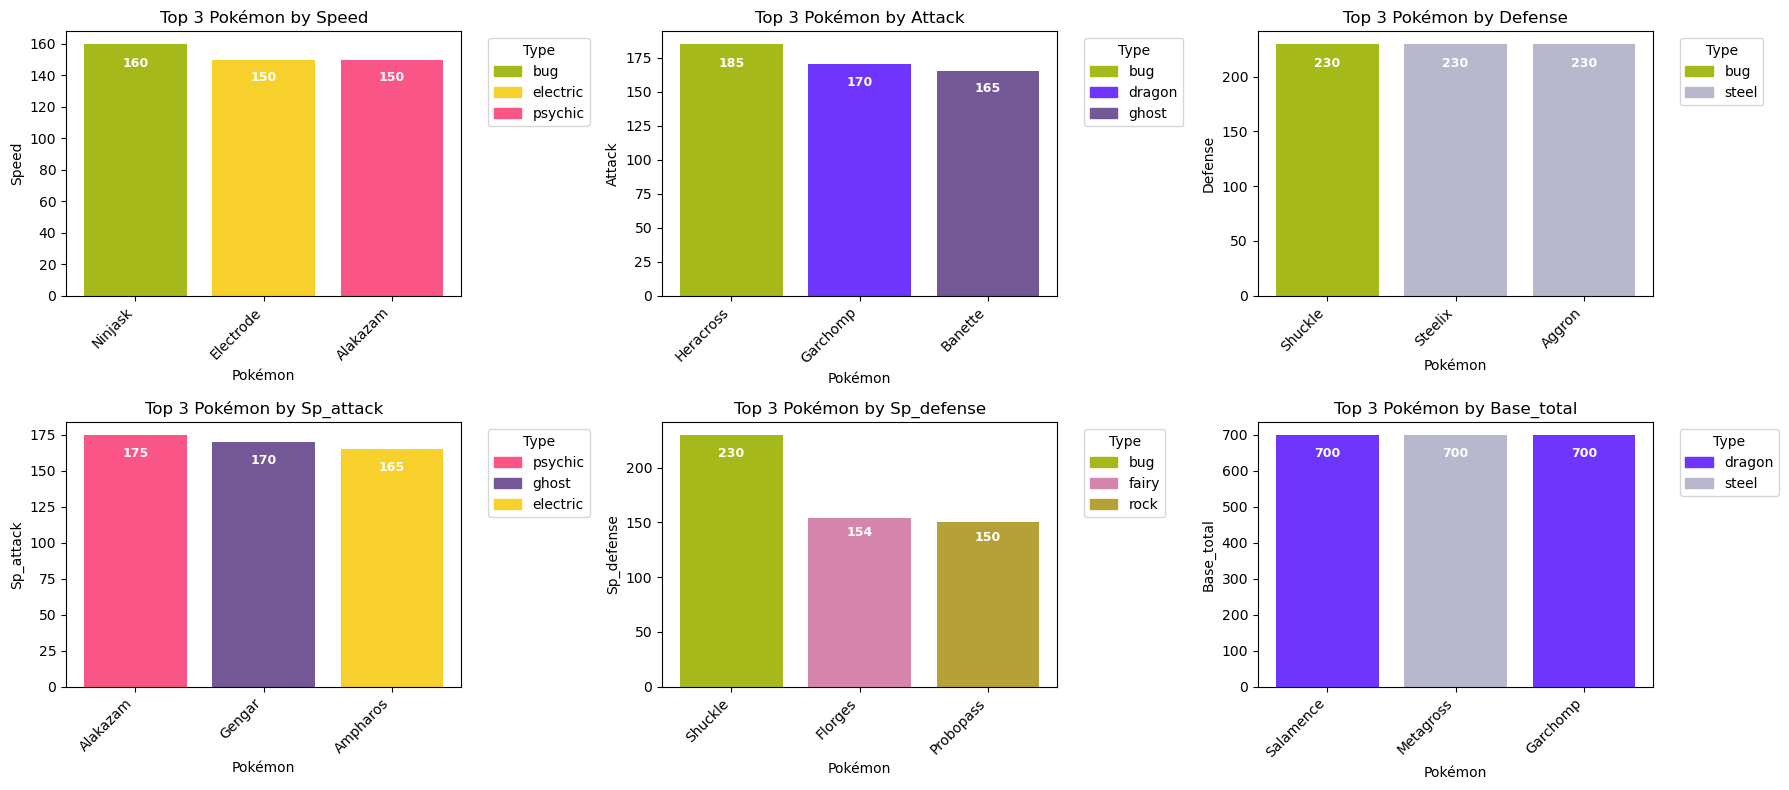

In [140]:
# Setup grid for subplots
n_cols = 3
n_rows = int(np.ceil(len(stats) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Iterate through stats list
for idx, stat in enumerate(stats):
    ax = axes[idx]
    
    # Remove legendaries
    non_legends = pokedex[pokedex['is_legendary'] == 0]
    
    # Top 3 Pokémon overall for this stat
    best = non_legends.sort_values(by=stat, ascending=False).head(3)[['name', stat, 'type1']]
    
    # Colors by type
    colors = best['type1'].map(type_colors).fillna('#808080')
    
    # Plot
    bars = ax.bar(best['name'], best[stat], color=colors)
    ax.set_xlabel('Pokémon')
    ax.set_ylabel(stat.capitalize())
    ax.set_title(f'Top 3 Pokémon by {stat.capitalize()}')
    
    # Labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,   
            height * 0.95,                      
            str(int(height)),                  
            ha='center', va='top', fontsize=9, color='white', fontweight='bold'
        )
    
    # Legend (types in this chart)
    unique_types = best['type1'].unique()
    handles = [plt.Rectangle((0,0),1,1, color=type_colors.get(t, '#808080')) for t in unique_types]
    ax.legend(handles, unique_types, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Rotate labels
    ax.set_xticks(range(len(best)))
    ax.set_xticklabels(best['name'], rotation=45, ha='right')

# Hide any unused subplots
for j in range(len(stats), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.clf()

### Exploring Weaknesses and Strengths cont. <a class='anchor' id='section4_2'></a>

We have now chosen our top 3 contenders for each stat. 

The next step is to find out which of our contending pokémon have the best overall strength against other pokémon by stat and type. To do this we'll tally each pokémons strengths and neutral, then subtract weaknesses. 

We also want to know the base total of each pokémons stats as this will also affect the outcome.

From the table below we can see that some pokémon have a net value of more strengths than weaknesses.
We can also see that some pokémon have much higher base stats than the other candidates.
The net value of strengths, and the base total stats will play a part in choosing the ultimate pokémon.

In [141]:
# against cols = all the against_ type columns in our pokedex
against_cols = [col for col in pokedex.columns if col.startswith('against_')]

#Define function to count and tally each pokemons strengths, neutrals and weaknesses  as 'net'
def count_strengths_weaknesses(row):
    strengths = (row[against_cols] < 1.0).sum()
    weaknesses = (row[against_cols] > 1.0).sum()
    neutral = (row[against_cols] == 0.0).sum()
    return pd.Series({
        'strengths': strengths,
        'weaknesses': weaknesses,
        'neutral': neutral,
        'net': strengths + neutral - weaknesses
    })

non_legends = pokedex[pokedex['is_legendary'] == 0]

#Select top 3 candidates
candidates = []
for stat in stats:
    top3 = (
        non_legends.sort_values(by=stat, ascending=False)
        .drop_duplicates(subset=['type1'], keep='first')
        .head(3)
    )
    #Apply count_strengths_weaknesses function to count the net total of strengths, append to list
    top3 = top3.join(top3.apply(count_strengths_weaknesses, axis=1))
    top3 = top3.assign(candidate_stat=stat)
    candidates.append(top3)

candidates_df = pd.concat(candidates)

# Add best stat as highest stat that isnt base_total 
candidates_df['best_stat'] = candidates_df[['speed', 'attack', 'defense', 'sp_attack', 'sp_defense']].idxmax(axis=1)

candidates_df[['candidate_stat', 'name', 'type1', 'strengths', 'weaknesses', 'neutral', 'net', 'base_total']]

,candidate_stat,name,type1,strengths,weaknesses,neutral,net,base_total
290,speed,Ninjask,bug,4,5,1,0,456
100,speed,Electrode,electric,3,1,0,2,490
64,speed,Alakazam,psychic,2,3,0,-1,600
213,attack,Heracross,bug,5,4,0,1,600
444,attack,Garchomp,dragon,4,3,1,2,700
353,attack,Banette,ghost,4,2,2,4,555
212,defense,Shuckle,bug,2,3,0,-1,505
207,defense,Steelix,steel,10,4,2,8,610
712,defense,Avalugg,ice,1,4,0,-3,514
64,sp_attack,Alakazam,psychic,2,3,0,-1,600


## Choosing our ultimate pokémon team <a class='anchor' id='choose'></a>

To choose our final 6 pokémon to create the ultimate pokémon team, we've decided to weigh strengths higher than total base stats. This is because our ultimate pokémon team is chosen for their single highest stat and how many pokémon they are effective against.

We will filter our winners based on stat and type, ordering by net to find the candidate with more strengths, then by total base stats if needed.

In [142]:
# Initialize variables 
winners = []
used_types = set()
filled_stats = set()

#Iterate through stats.
for stat in stats:
    pool = candidates_df[candidates_df['candidate_stat'] == stat]
    
    # Sort by net first, then base total
    pool = pool.sort_values(by=['base_total', 'net'], ascending=False)
    
    chosen = None
    for _, row in pool.iterrows():
        # Choose pokemon only if its highest stat is its best stat.
        if row['best_stat'] == stat and row['type1'] not in used_types:
            chosen = row
            break
    
    # If there is no valid 'best stat' Pokémon, Choose next pokemon in the list.
    if chosen is None:
        for _, row in pool.iterrows():
            if row['type1'] not in used_types:
                chosen = row
                break
    #Append chosen pokemon to winners, Set type as in use, and set stat it was chosen for.
    if chosen is not None:
        winners.append(chosen)
        used_types.add(chosen['type1'])
        filled_stats.add(stat)



## Ultimate pokémon team <a class='anchor' id='conclusion'></a>

Through our analysis we've found the ultimate pokémon team following our parameters below:

* Only one pokémon per type, and only one of each pokémon.
* Exclude legendary and Mega evolutions.
* The best pokémon per type is decided by its total stat score, x stat score, and how many other pokémon it is effective against.
* The team will consist of the highest of each stat, excluding hp, and the highest total stat pokémon.

Our ultimate pokémon team can be found in the table below:

In [143]:
winners_df = pd.DataFrame(winners)

winners_df[['candidate_stat', 'name', 'type1'] + stats + ['net', 'base_total']]

,candidate_stat,name,type1,speed,attack,defense,sp_attack,sp_defense,base_total,net,base_total
100,speed,Electrode,electric,150,50,70,80,80,490,2,490
444,attack,Garchomp,dragon,92,170,115,120,95,700,2,700
207,defense,Steelix,steel,30,125,230,55,95,610,8,610
93,sp_attack,Gengar,ghost,130,65,80,170,95,600,4,600
670,sp_defense,Florges,fairy,75,65,68,112,154,552,3,552
247,base_total,Tyranitar,rock,71,164,150,95,120,700,1,700


## Extra <a class='anchor' id='extra'></a>

During the analysis to find the ultimate pokémon team, we discovered:

* Which pokémon type has the best average of each stat:
Speed: Electric types
Attack: Dragon types
Defense: Steel types
Special attack: Psychich types
Special defense: Fairy types
Total base stats: Dragon types

* Which pokémon type was the weakest of each stat:
Speed: Steel types
Attack: Psychic types
Defense: Psychic types
Special attack: Ground types
Special defense: Ground types
Total base stats: Bug types

* Which pokémon is the strongest of each stat:
Speed: Ninjask(Bug)
Attack: Heracross(Bug)
Defense: Shuckle(Bug), Steelix(Steel), Aggron(Steel) 
Special attack: Alakazam(Psychic)
Special defense: Shuckle(Bug)
Total base stats: Salamence(Dragon), Garchomp(Dragon), Tyranitar(Rock) and Metagross(Steel) 

Theres still some fun info we can gather from the pokédex, such as the questions we asked earlier:

* Which pokémon is the tallest?
* Which pokemon is the smallest?
* Which pokémon weighs the most?
* which pokemon weighs the least?


### Which pokémon is the tallest? <a class='anchor' id='extra_1'></a>


The tallest pokemon is Wailord(Water) at 14.5m.

<Figure size 640x480 with 0 Axes>

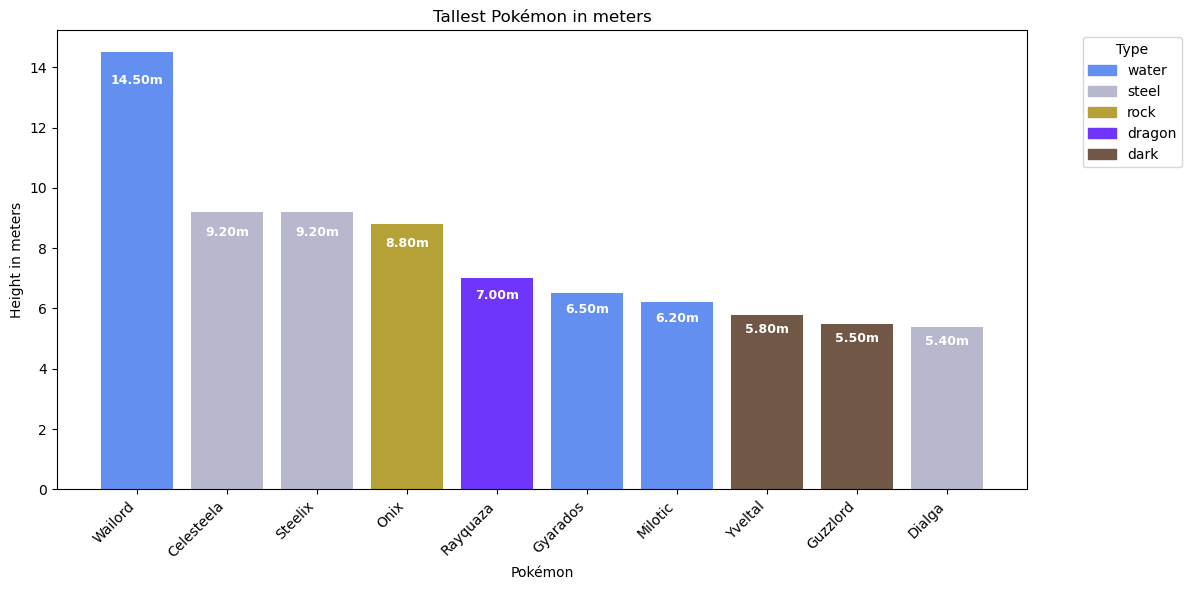

In [144]:
#  Sort descending by weight, limit to 10
tallest = pokedex.sort_values(by='height_m', ascending=False).head(10)

# Assign colors based on type
colors = tallest['type1'].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tallest['name'], tallest['height_m'], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        f'{height:.2f}' +'m',                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

# Labels
plt.xlabel('Pokémon')
plt.ylabel('Height in meters')
plt.title('Tallest Pokémon in meters')

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in tallest['type1'].unique()]
labels = tallest['type1'].unique()
plt.legend(handles, labels, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

### Which pokémon is the shortest? <a class='anchor' id='extra_2'></a>

There are 27 pokemon that are all 0.2m tall.

<Figure size 640x480 with 0 Axes>

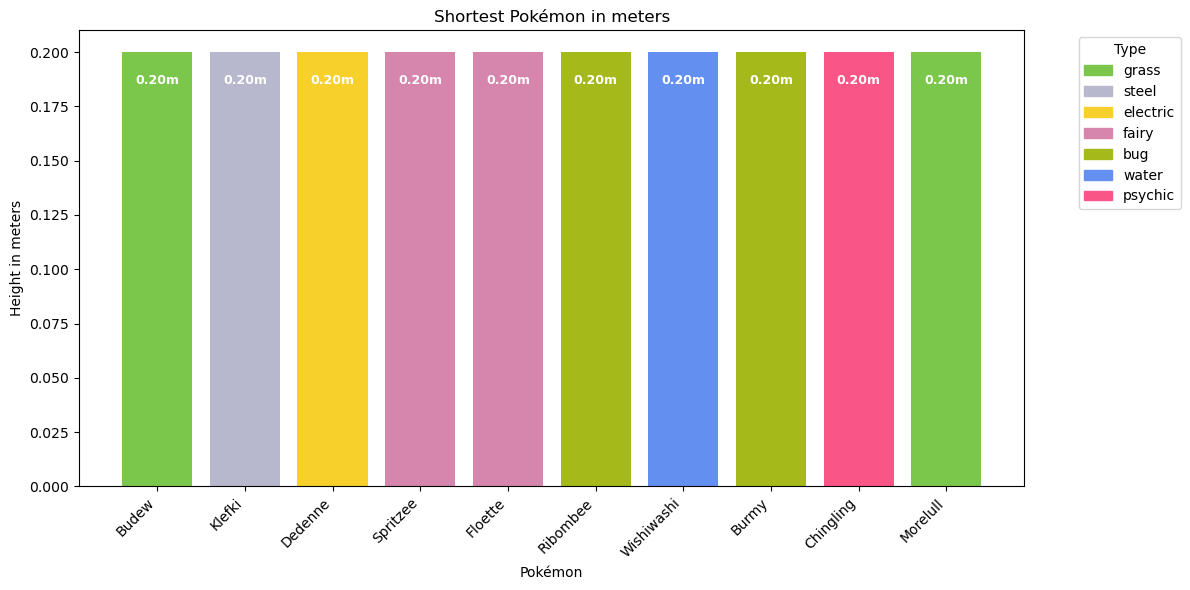

In [145]:
#  Sort by height limit to 10
short = pokedex[pokedex['height_m'] > 0.1]

shortest = short.sort_values(by='height_m').head(10)
# Assign colors based on type
colors = shortest['type1'].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(shortest['name'], shortest['height_m'], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        f'{height:.2f}' +'m',                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

# Labels
plt.xlabel('Pokémon')
plt.ylabel('Height in meters')
plt.title('Shortest Pokémon in meters')

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in shortest['type1'].unique()]
labels = shortest['type1'].unique()
plt.legend(handles, labels, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

### Which pokémon weighs the most? <a class='anchor' id='extra_3'></a>

Cosmoem(Psychic) and Celesteela(Steel) are the heaviest pokémons at 999.90kg

<Figure size 640x480 with 0 Axes>

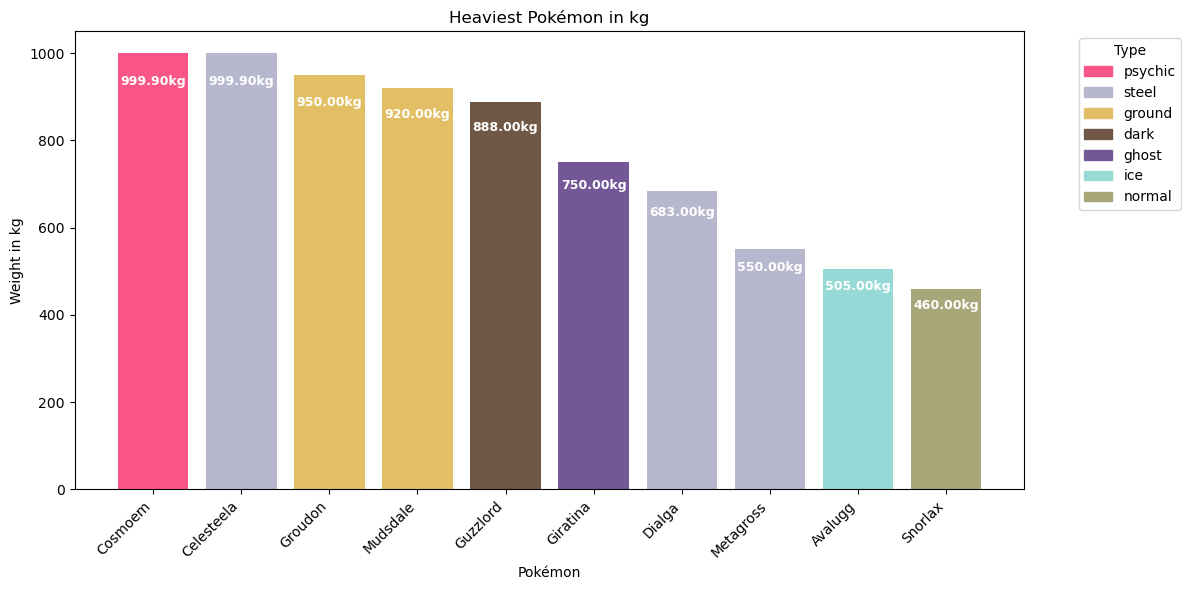

In [146]:
# # Sort descending by weight, limit to 10
heaviest = pokedex.sort_values(by="weight_kg", ascending=False).head(10)

# Assign colors based on type
colors = heaviest["type1"].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(heaviest["name"], heaviest["weight_kg"], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        f"{height:.2f}" +'kg',                  
        ha='center', va='top', fontsize=9, color="white", fontweight="bold"
    )

# Labels
plt.xlabel("Pokémon")
plt.ylabel("Weight in kg")
plt.title("Heaviest Pokémon in kg")

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in heaviest["type1"].unique()]
labels = heaviest["type1"].unique()
plt.legend(handles, labels, title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
plt.clf()

### Which pokémon weighs the least? <a class='anchor' id='extra_4'></a>

The pokémons that weighs the least are: Gastly(Ghost), Cosmog(Psychic), Kartana(Grass), Haunter(Ghost) and Flabébé(Fairy) at 0.10kg

<Figure size 640x480 with 0 Axes>

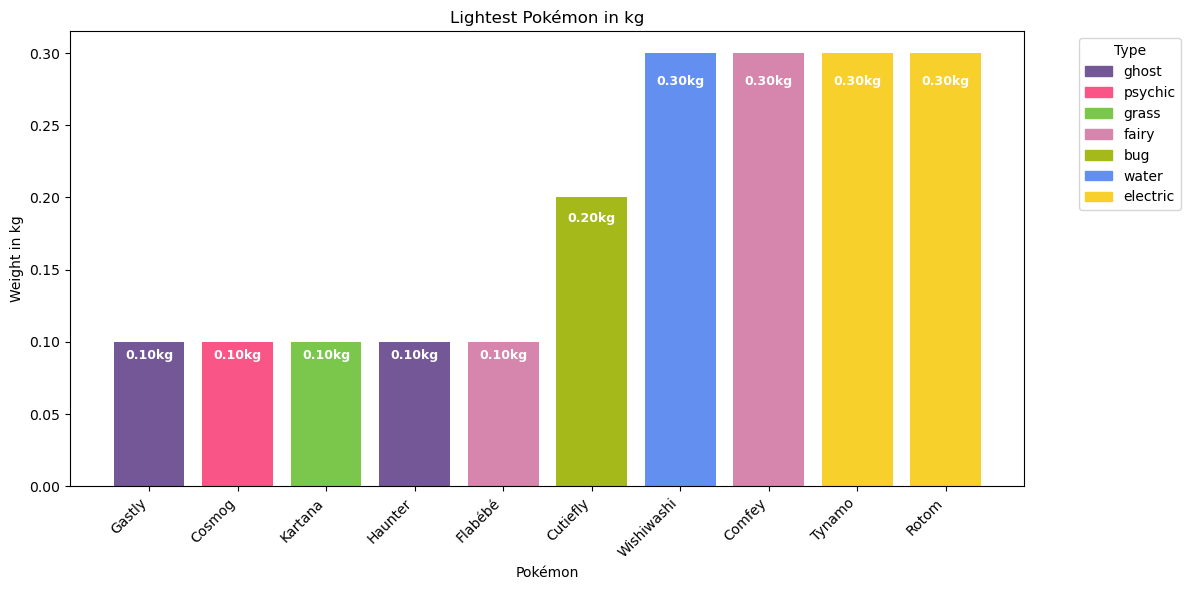

In [147]:
#Weight higher than 0
weight = pokedex[pokedex['weight_kg'] >0]
  

#  Sort descending by weight, limit to 10
lightest = weight.sort_values(by='weight_kg').head(10)

# Assign colors based on type
colors = lightest['type1'].map(type_colors)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(lightest['name'], lightest['weight_kg'], color=colors)

# Add labels inside bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height * 0.95,                      
        f'{height:.2f}' +'kg',                  
        ha='center', va='top', fontsize=9, color='white', fontweight='bold'
    )

# Labels
plt.xlabel('Pokémon')
plt.ylabel('Weight in kg')
plt.title('Lightest Pokémon in kg')

# Legend (unique types with their colors)
handles = [plt.Rectangle((0,0),1,1, color=type_colors[t]) for t in lightest['type1'].unique()]
labels = lightest['type1'].unique()
plt.legend(handles, labels, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()